In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [150]:
bank_df = pd.read_csv('Hackathon/bank-additional/bank-additional/bank-additional-full.csv')
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [35]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [66]:
bank_df.isin(['unknown']).sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [129]:
bank_add_full_num_cols = bank_df._get_numeric_data().columns
bank_add_full_cat_cols = set(bank_df.columns) -  set(bank_add_full_num_cols)

print('bank_add_full_num_cols',bank_add_full_num_cols)
print('bank_add_full_cat_cols',bank_add_full_cat_cols)

bank_add_full_num_cols Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')
bank_add_full_cat_cols {'housing', 'job', 'default', 'poutcome', 'y', 'day_of_week', 'loan', 'marital', 'month', 'education', 'contact'}


In [13]:
def findUniueValues(df,columnList) :
    for i, col in enumerate(columnList):
        print(col,"::",df[col].unique())
        print()



In [38]:
# Unique values of categorical columns
findUniueValues(bank_dfbank_df,bank_add_full_cat_cols)

loan :: ['no' 'yes' 'unknown']

marital :: ['married' 'single' 'divorced' 'unknown']

poutcome :: ['nonexistent' 'failure' 'success']

contact :: ['telephone' 'cellular']

education :: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

housing :: ['no' 'yes' 'unknown']

month :: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

job :: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

day_of_week :: ['mon' 'tue' 'wed' 'thu' 'fri']

default :: ['no' 'unknown' 'yes']

y :: ['no' 'yes']



In [39]:
# Unique values of numerical columns
findUniueValues(bank_df,bank_add_full_num_cols)

age :: [56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44 42
 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67 73 88
 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91 86 98 94
 84 92 89]

duration :: [ 261  149  226 ..., 1246 1556 1868]

campaign :: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56 39
 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]

pdays :: [999   6   4   3   5   1   0  10   7   8   9  11   2  12  13  14  15  16
  21  17  18  22  25  26  19  27  20]

previous :: [0 1 2 3 4 5 6 7]

emp.var.rate :: [ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]

cons.price.idx :: [ 93.994  94.465  93.918  93.444  93.798  93.2    92.756  92.843  93.075
  92.893  92.963  92.469  92.201  92.379  92.431  92.649  92.713  93.369
  93.749  93.876  94.055  94.215  94.027  94.199  94.601  94.767]

cons.conf.idx :: [-36.4 -41.8 -42.7 -36.1 -40.4 -42.  -45.9 -50.  -47.1 -46.2 -40.8 -33.6
 -31.4 -29.8 -26.9 

In [40]:
# Unique values
bank_df.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
y                    2
dtype: int64

# EDA

## Imbalanced or balanced dataset

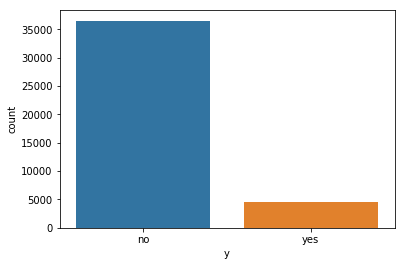

In [41]:
sns.countplot(bank_df.y)

In [42]:
# Sample is biased
no_per = (bank_df[bank_df.y == 'no'].default.count()/bank_df.y.count())*100
yes_per = (bank_df[bank_df.y == 'yes'].default.count()/bank_df.y.count())*100
print('Percentage of yes values: {:.2f}'.format(yes_per))
print('Percentage of no values: {:.2f}'.format(no_per))


Percentage of yes values: 11.27
Percentage of no values: 88.73


## Month

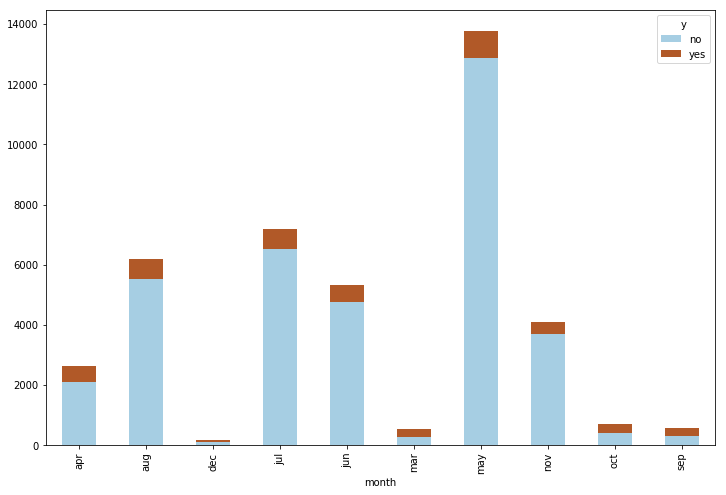

In [43]:
bank_month_crosstab = pd.crosstab(index=bank_df.month,columns=bank_df.y)
bank_month_crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

In [25]:
bank_month_crosstab['conv_rate'] = (bank_month_crosstab.yes/(bank_month_crosstab.no +bank_month_crosstab.yes))*100
bank_month_crosstab

y,no,yes,conv_rate
month,,,
apr,2093,539,20.478723
aug,5523,655,10.602137
dec,93,89,48.901099
jul,6525,649,9.046557
jun,4759,559,10.511470
mar,270,276,50.549451
may,12883,886,6.434745
nov,3685,416,10.143867
oct,403,315,43.871866


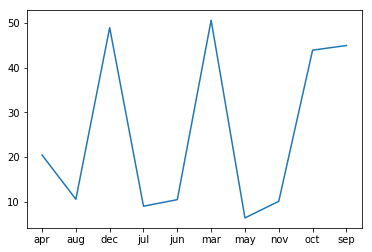

In [26]:
plt.plot(bank_month_crosstab.index, bank_month_crosstab['conv_rate'])

## Day of the week

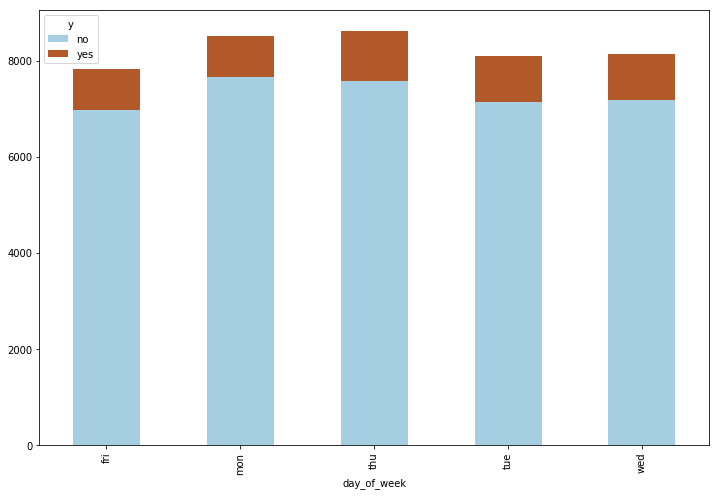

In [44]:
bank_day_crosstab = pd.crosstab(index=bank_df.day_of_week,columns=bank_df.y)
bank_day_crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

In [32]:
bank_day_crosstab['conv_rate'] = (bank_day_crosstab.yes/(bank_day_crosstab.no +bank_day_crosstab.yes))*100
bank_day_crosstab

y,no,yes,conv_rate
day_of_week,,,
fri,6981,846,10.808739
mon,7667,847,9.948320
thu,7578,1045,12.118752
tue,7137,953,11.779975
wed,7185,949,11.667076


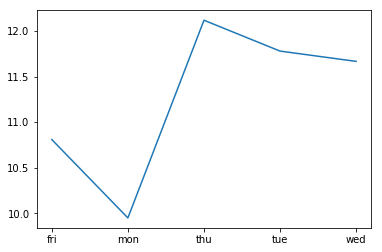

In [33]:
plt.plot(bank_day_crosstab.index, bank_day_crosstab['conv_rate'])

# Conclusion

1. Different for different days of the week

# Job

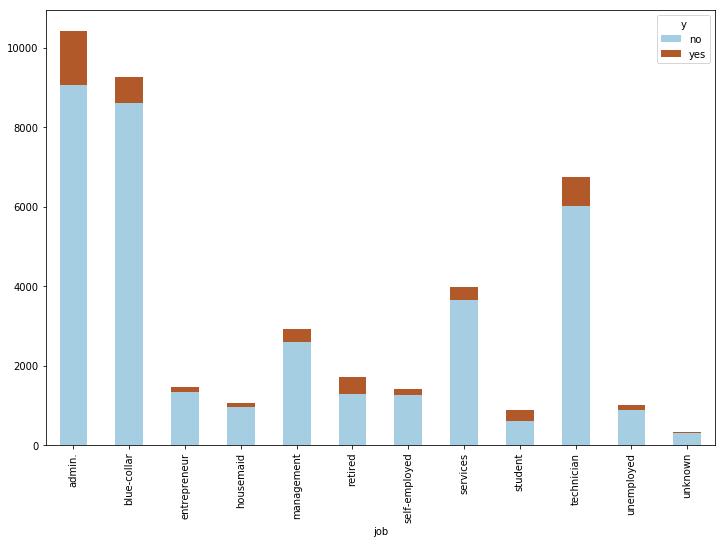

In [45]:
bank_job_crosstab = pd.crosstab(index=bank_df.job,columns=bank_df.y)
bank_job_crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

In [46]:
bank_job_crosstab['conv_rate'] = (bank_job_crosstab.yes/(bank_job_crosstab.no +bank_job_crosstab.yes))*100
bank_job_crosstab

y,no,yes,conv_rate
job,,,
admin.,9070,1352,12.972558
blue-collar,8616,638,6.894316
entrepreneur,1332,124,8.516484
housemaid,954,106,10.000000
management,2596,328,11.217510
retired,1286,434,25.232558
self-employed,1272,149,10.485574
services,3646,323,8.138070
student,600,275,31.428571


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 <a list of 12 Text xticklabel objects>)

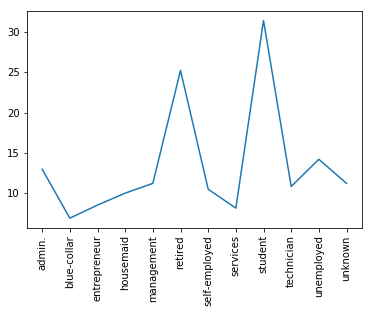

In [48]:
plt.plot(bank_job_crosstab.index, bank_job_crosstab['conv_rate'])
plt.xticks(rotation=90)

# Conclusion
1. Retired and student have the highest conversion rate

# Marital

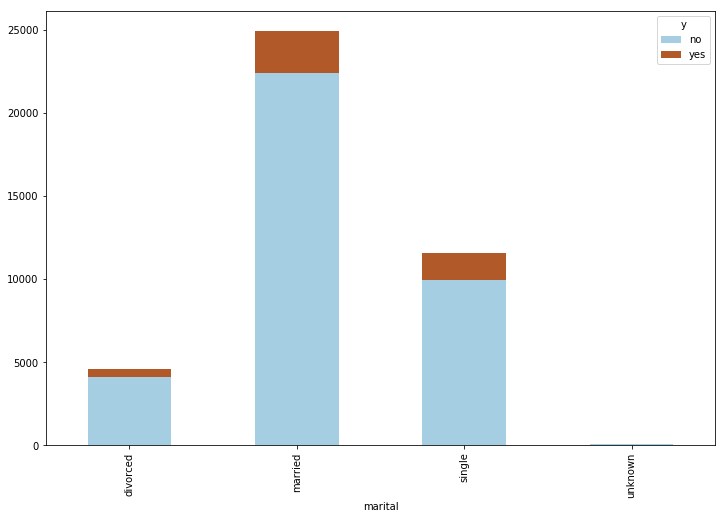

In [49]:
bank_marital_crosstab = pd.crosstab(index=bank_df.marital,columns=bank_df.y)
bank_marital_crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

In [50]:
bank_marital_crosstab['conv_rate'] = (bank_marital_crosstab.yes/(bank_marital_crosstab.no +bank_marital_crosstab.yes))*100
bank_marital_crosstab

y,no,yes,conv_rate
marital,,,
divorced,4136,476,10.320902
married,22396,2532,10.157253
single,9948,1620,14.004149
unknown,68,12,15.000000


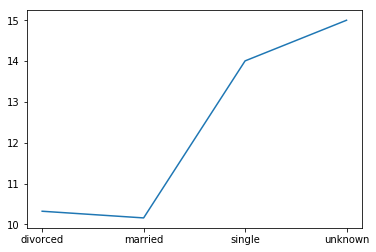

In [51]:
plt.plot(bank_marital_crosstab.index, bank_marital_crosstab['conv_rate'])


# Conclusion
1. Divorced and single are the maximum

# Education

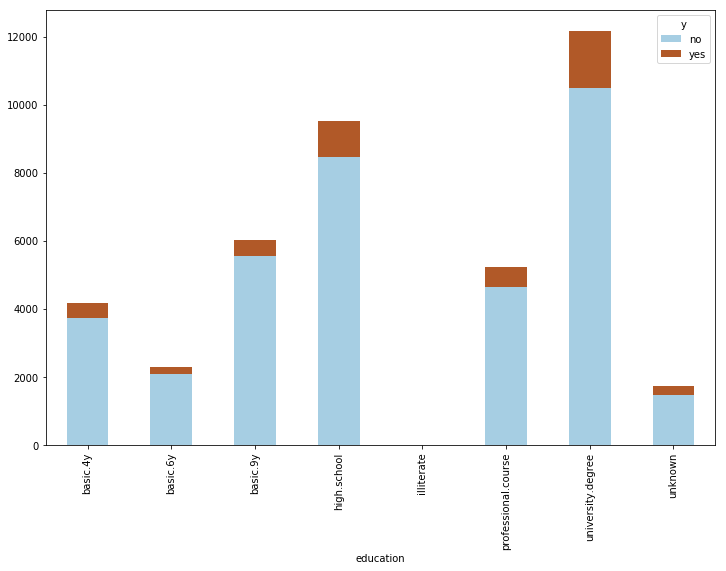

In [52]:
bank_edu_crosstab = pd.crosstab(index=bank_df.education,columns=bank_df.y)
bank_edu_crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

In [53]:
bank_edu_crosstab['conv_rate'] = (bank_edu_crosstab.yes/(bank_edu_crosstab.no +bank_edu_crosstab.yes))*100
bank_edu_crosstab

y,no,yes,conv_rate
education,,,
basic.4y,3748,428,10.249042
basic.6y,2104,188,8.202443
basic.9y,5572,473,7.824648
high.school,8484,1031,10.835523
illiterate,14,4,22.222222
professional.course,4648,595,11.348465
university.degree,10498,1670,13.724523
unknown,1480,251,14.500289


([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

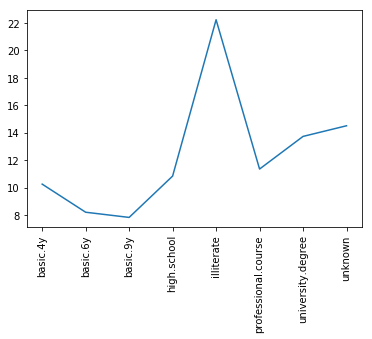

In [55]:
plt.plot(bank_edu_crosstab.index, bank_edu_crosstab['conv_rate'])
plt.xticks(rotation=90)

# Conclusion
1. Tertiary is the highest

## Housing

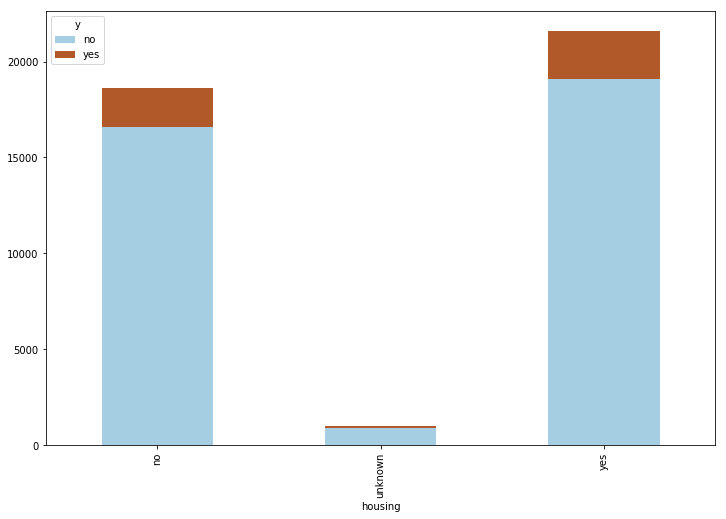

In [56]:
bank_house_crosstab = pd.crosstab(index=bank_df.housing,columns=bank_df.y)
bank_house_crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

In [57]:
bank_house_crosstab['conv_rate'] = (bank_house_crosstab.yes/(bank_house_crosstab.no +bank_house_crosstab.yes))*100
bank_house_crosstab

y,no,yes,conv_rate
housing,,,
no,16596,2026,10.879605
unknown,883,107,10.808081
yes,19069,2507,11.619392


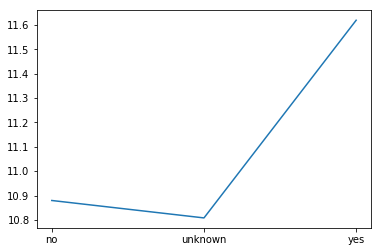

In [58]:
plt.plot(bank_house_crosstab.index, bank_house_crosstab['conv_rate'])

# Conclusion
1. The ones who don't have housing loan are the recipients of loan

## Loan

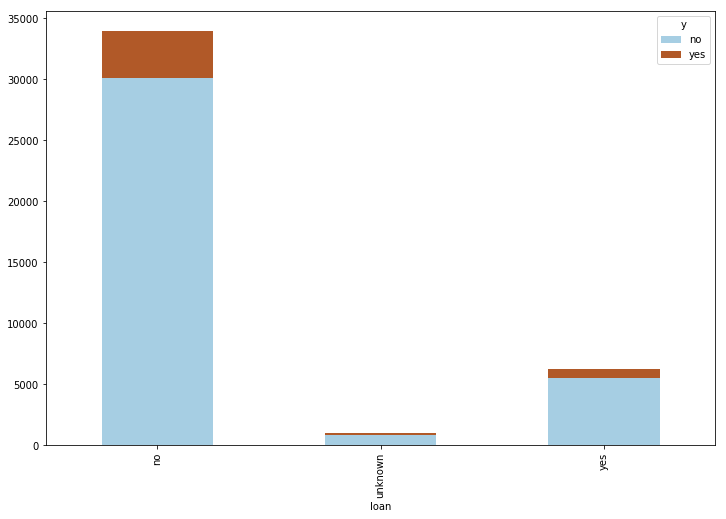

In [59]:
bank_loan_crosstab = pd.crosstab(index=bank_df.loan,columns=bank_df.y)
bank_loan_crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

In [60]:
bank_loan_crosstab['conv_rate'] = (bank_loan_crosstab.yes/(bank_loan_crosstab.no +bank_loan_crosstab.yes))*100
bank_loan_crosstab

y,no,yes,conv_rate
loan,,,
no,30100,3850,11.340206
unknown,883,107,10.808081
yes,5565,683,10.931498


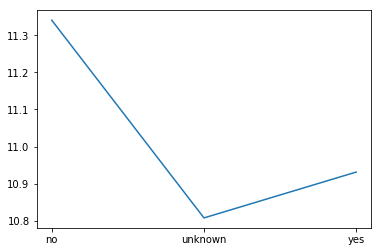

In [61]:
plt.plot(bank_loan_crosstab.index, bank_loan_crosstab['conv_rate'])

## Conclusion
1. The ones who don't have housing loan are the recipients of loan

## Contact

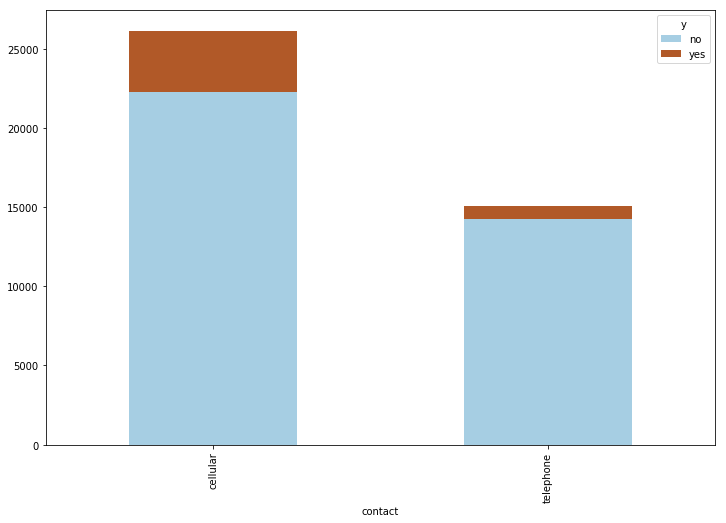

In [62]:
bank_contact_crosstab = pd.crosstab(index=bank_df.contact,columns=bank_df.y)
bank_contact_crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

In [63]:
bank_contact_crosstab['bank_conv_rate'] = (bank_contact_crosstab.yes/(bank_contact_crosstab.no +bank_contact_crosstab.yes))*100
bank_contact_crosstab

y,no,yes,bank_conv_rate
contact,,,
cellular,22291,3853,14.737607
telephone,14257,787,5.231321


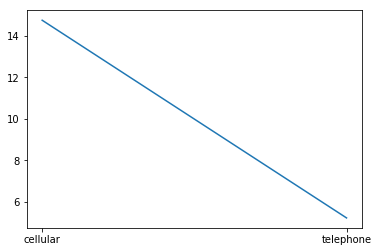

In [64]:
plt.plot(bank_contact_crosstab.index, bank_contact_crosstab['bank_conv_rate'])

## Poutcome

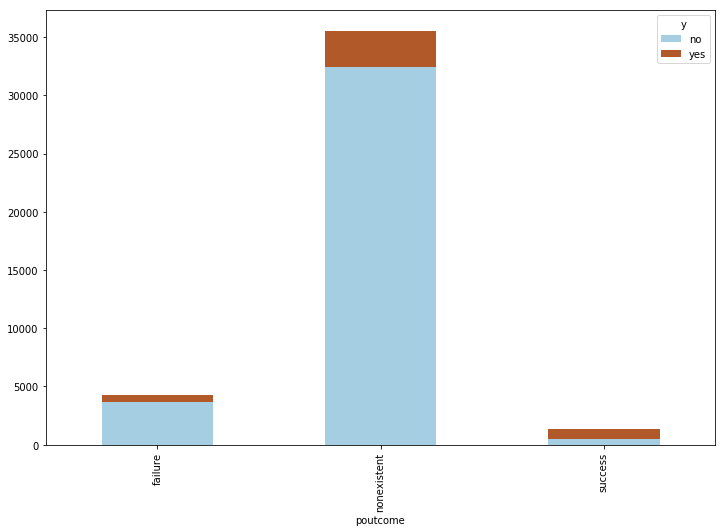

In [65]:
bank_poutcome_crosstab = pd.crosstab(index=bank_df.poutcome,columns=bank_df.y)
bank_poutcome_crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

In [66]:
bank_poutcome_crosstab['conv_rate'] = (bank_poutcome_crosstab.yes/(bank_poutcome_crosstab.no +bank_poutcome_crosstab.yes))*100
bank_poutcome_crosstab

y,no,yes,conv_rate
poutcome,,,
failure,3647,605,14.228598
nonexistent,32422,3141,8.832213
success,479,894,65.112891


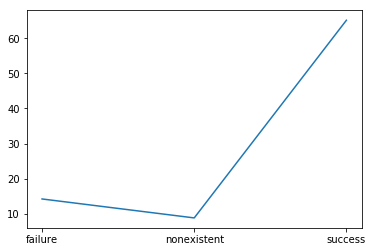

In [68]:
plt.plot(bank_poutcome_crosstab.index, bank_poutcome_crosstab['conv_rate'])

# Conclusion
1. Conversion rate is high among the previous successfully converted customers

## Default

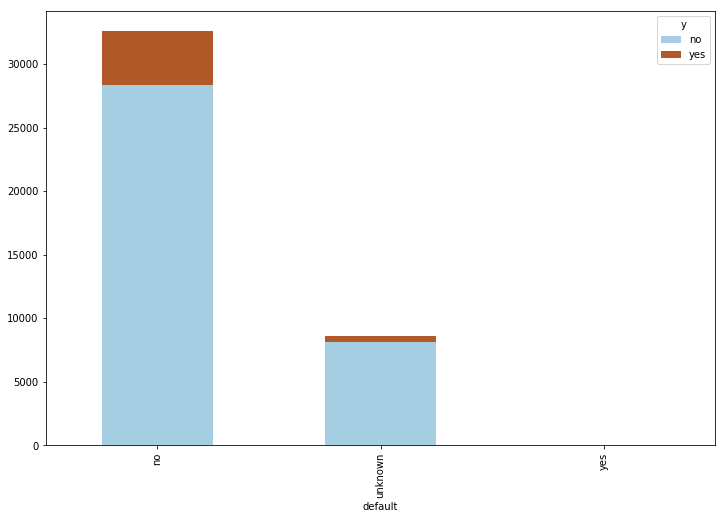

In [70]:
bank_default_crosstab = pd.crosstab(index=bank_df.default,columns=bank_df.y)
bank_default_crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

In [71]:
bank_default_crosstab['conv_rate'] = (bank_default_crosstab.yes/(bank_default_crosstab.no +bank_default_crosstab.yes))*100
bank_default_crosstab

y,no,yes,conv_rate
default,,,
no,28391,4197,12.878974
unknown,8154,443,5.152960
yes,3,0,0.000000


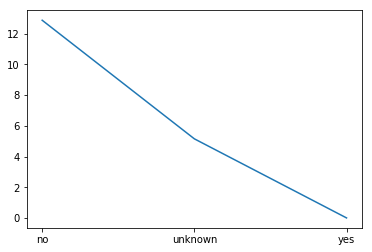

In [72]:
plt.plot(bank_default_crosstab.index, bank_default_crosstab['conv_rate'])

## Conclusion
1. Clearly shows that previously defaulted customers are not prefered

In [73]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

# Description of numerical data

In [12]:
bank_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


## Age

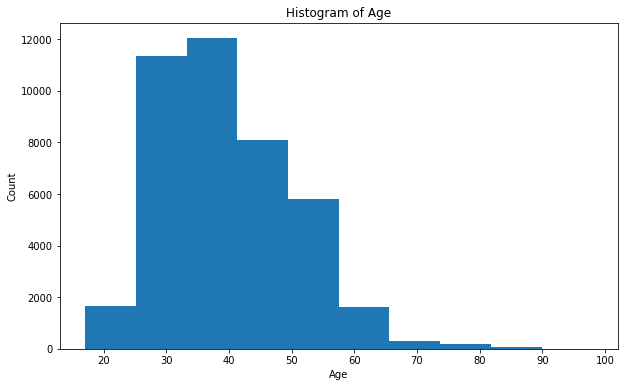

In [5]:
#Distribution of Age
plt.figure(figsize=(10,6))
plt.hist(bank_df['age'])
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

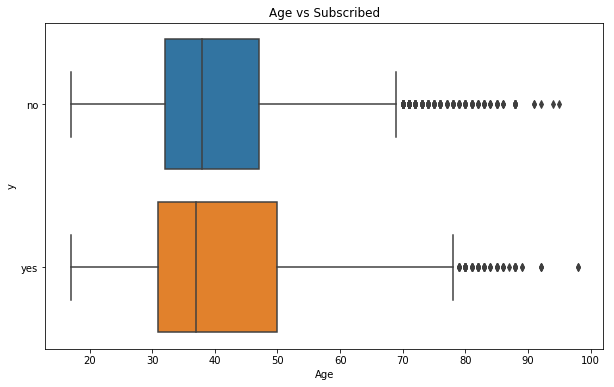

In [6]:
# Boxplot of Age
plt.figure(figsize=(10,6))
sns.boxplot(x='age',y='y',data=bank_df)
plt.xlabel('Age')
plt.title('Age vs Subscribed')
plt.show()

## Conclusion
1.The distribution is skewed towards the right. However all the points are important including the outliers. The outliers are retired.

## Duration

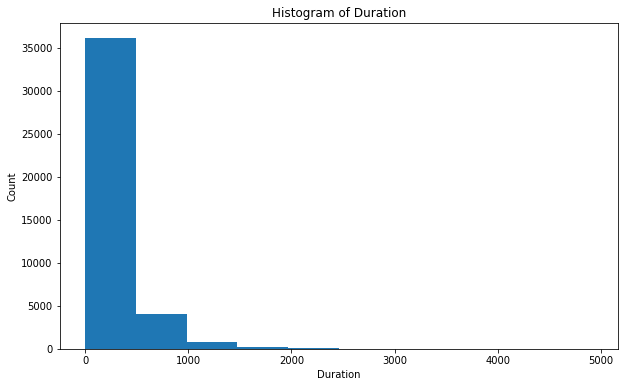

In [7]:
#Distribution of Duration
plt.figure(figsize=(10,6))
plt.hist(bank_df['duration'])
plt.title('Histogram of Duration')
plt.xlabel('Duration(sec)')
plt.ylabel('Count')
plt.show()

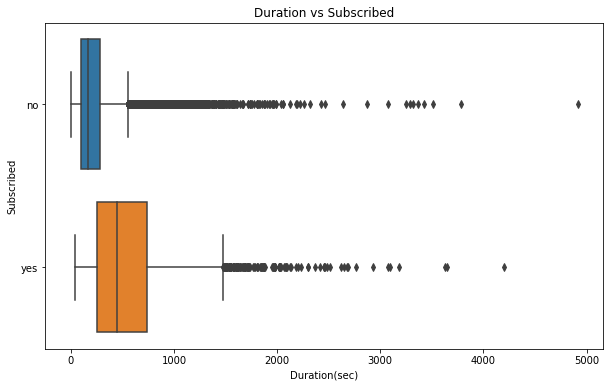

In [11]:
# Boxplot of Duration
plt.figure(figsize=(10,6))
sns.boxplot(x='duration',y='y',data=bank_df)
plt.xlabel('Duration(sec)')
plt.ylabel('Subscribed')
plt.title('Duration vs Subscribed')
plt.show()

## Conclusion

## Campaign

### Number of contacts performed during this campaign and for this client (includes last contact)

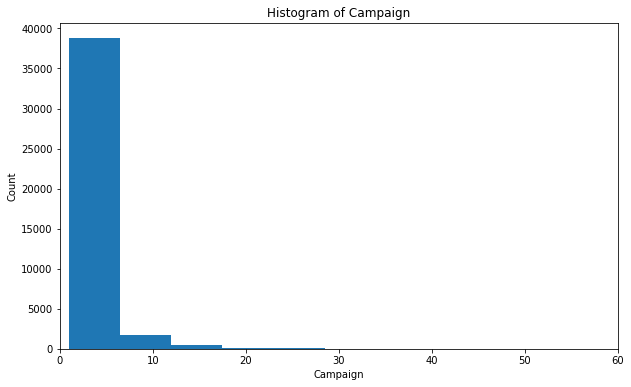

In [18]:
#Distribution of Campaign
plt.figure(figsize=(10,6))
plt.hist(bank_df['campaign'])
plt.xlim(0,60)
plt.title('Histogram of Campaign')
plt.xlabel('Campaign')
plt.ylabel('Count')
plt.show()

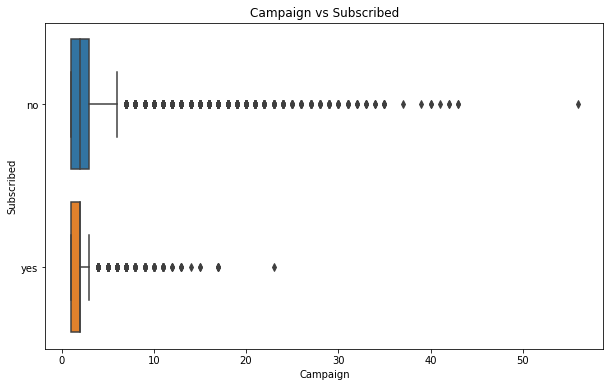

In [19]:
# Boxplot of Campaign
plt.figure(figsize=(10,6))
sns.boxplot(x='campaign',y='y',data=bank_df)
plt.xlabel('Campaign')
plt.ylabel('Subscribed')
plt.title('Campaign vs Subscribed')
plt.show()

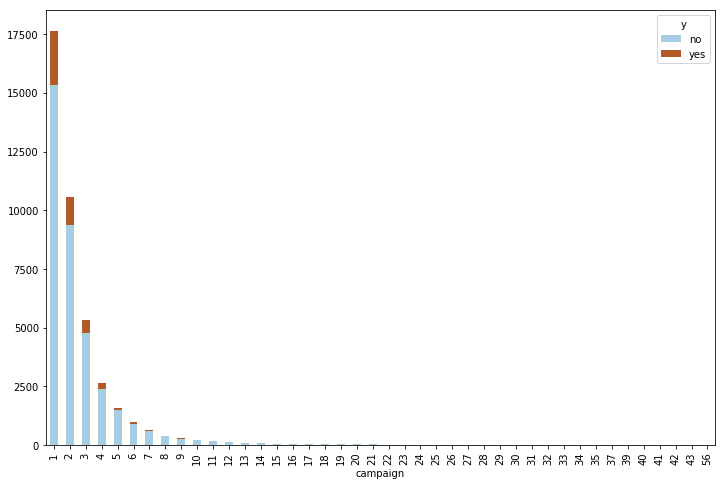

In [20]:
bank_campaign_crosstab = pd.crosstab(index=bank_df.campaign,columns=bank_df.y)
bank_campaign_crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

In [26]:
bank_campaign_crosstab['conv_rate'] = (bank_campaign_crosstab.yes/(bank_campaign_crosstab.no +bank_campaign_crosstab.yes))*100
bank_campaign_crosstab.sort_values(by='conv_rate',ascending=False)[:20]

y,no,yes,conv_rate
campaign,,,
1,15342,2300,13.037071
2,9359,1211,11.456954
3,4767,574,10.747051
4,2402,249,9.392682
6,904,75,7.660878
5,1479,120,7.504690
17,54,4,6.896552
11,165,12,6.779661
23,15,1,6.250000


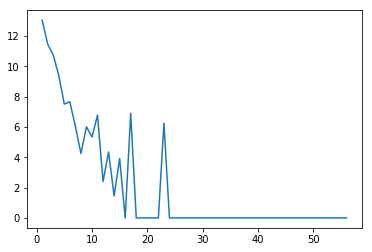

In [27]:
plt.plot(bank_campaign_crosstab.index, bank_campaign_crosstab['conv_rate'])

## Conclusion
Conversion rate reduces between 1-8 calls and shows an erratic response thereafter

## Previous

### Number of contacts performed before this campaign and for this client

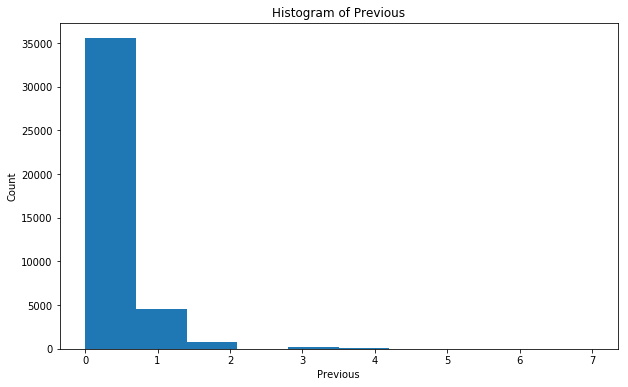

In [36]:
#Distribution of Previous
plt.figure(figsize=(10,6))
plt.hist(bank_df['previous'])

plt.title('Histogram of Previous')
plt.xlabel('Previous')
plt.ylabel('Count')
plt.show()

bank_previous_crosstab = pd.crosstab(index=bank_df.previous,columns=bank_df.y)
bank_previous_crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

In [33]:
bank_previous_crosstab['conv_rate'] = (bank_previous_crosstab.yes/(bank_previous_crosstab.no +bank_previous_crosstab.yes))*100
bank_previous_crosstab[:25]

y,no,yes,conv_rate
previous,,,
0,32422,3141,8.832213
1,3594,967,21.201491
2,404,350,46.419098
3,88,128,59.259259
4,32,38,54.285714
5,5,13,72.222222
6,2,3,60.000000
7,1,0,0.000000


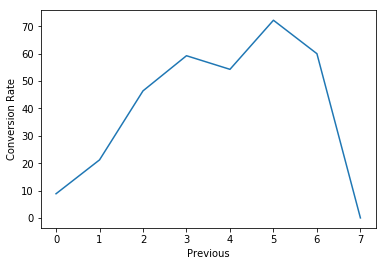

In [35]:
plt.plot(bank_previous_crosstab.index, bank_previous_crosstab['conv_rate'])
plt.ylabel('Conversion Rate')
plt.xlabel('Previous')
plt.show()

## Conclusion
1. Conversion rate increases between 0-3 times contacted previously


## Pdays

### Number of days that passed by after the client was last contacted from a previous campaign 

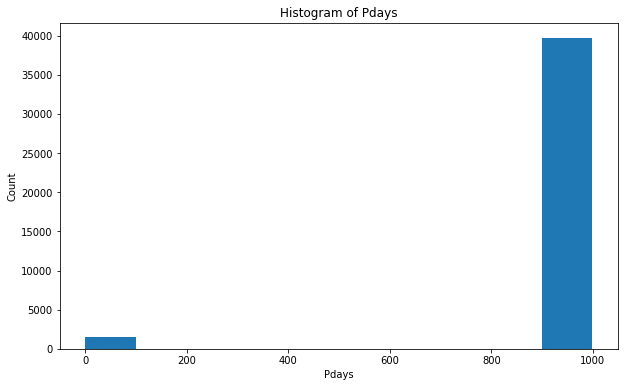

In [38]:
#Distribution of Pdays
plt.figure(figsize=(10,6))
plt.hist(bank_df['pdays'])

plt.title('Histogram of Pdays')
plt.xlabel('Pdays')
plt.ylabel('Count')
plt.show()

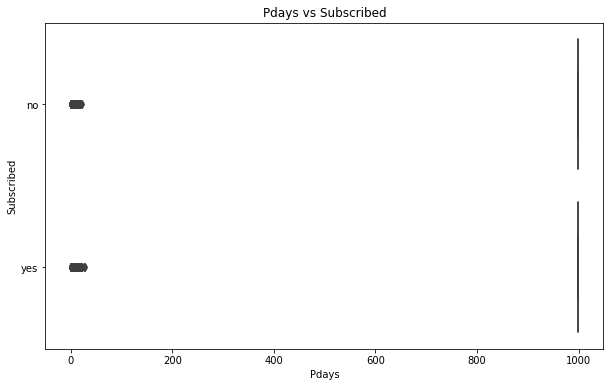

In [39]:
# Boxplot of Pdays
plt.figure(figsize=(10,6))
sns.boxplot(x='pdays',y='y',data=bank_df)
plt.xlabel('Pdays')
plt.ylabel('Subscribed')
plt.title('Pdays vs Subscribed')
plt.show()

## Correlation Matrix

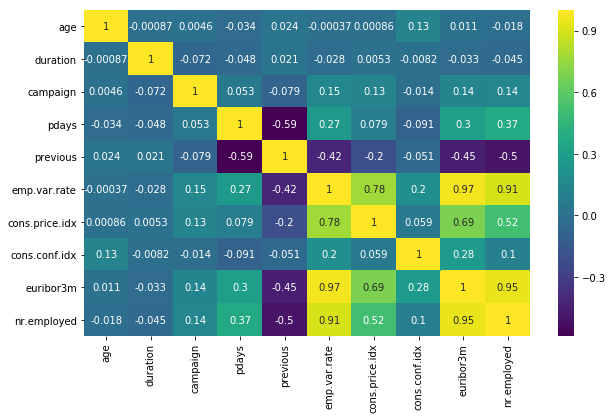

In [41]:
plt.figure(figsize=(10,6))
sns.heatmap(bank_df.corr(), annot=True, cmap = 'viridis')

# Model

In [86]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier,BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score,precision_score
from sklearn.metrics import roc_curve,auc,recall_score,roc_auc_score,accuracy_score,make_scorer

In [87]:
def split_X_y(dataframe, target='y'):
    # Creates X matrix od independent variables and the dependent y vector from dataframe; return X, y
    y = dataframe[target]
    X = dataframe.drop([target], axis=1)
    return X, y

def split_train_test(X, y, test_size=0.3, random_state=9):
    # Performs train test split  and returns X_train, X_test, y_train, y_test
    X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=test_size, random_state=random_state)
    return X_train, X_test, y_train, y_test

def label_encoding_(cat_col):
    label=preprocessing.LabelEncoder()
    label.fit(cat_col)
    return pd.DataFrame(label.transform(cat_col))


def metrics_info(y_test,y_pred):
    confusion_matrix_metrics(y_test,y_pred)
    roc_auc_metrics(y_test,y_pred)
    
    print('F1 score: ', f1_score(y_test,y_pred))
    print('*'*100)

def log_metrics_info(y_test,y_pred,y_pred_prob):
    confusion_matrix_metrics(y_test,y_pred)
    roc_auc_log_metrics(y_test,y_pred,y_pred_prob)
    
    print('F1 score: ', f1_score(y_test,y_pred))
    print('*'*100)

def confusion_matrix_metrics(y_test,y_pred):
    # Printing values of different performance metrics
    conf_matrix = confusion_matrix(y_test,y_pred)
    print('Confusion Matrix: ', conf_matrix)
    TP = conf_matrix[1,1]
    TN = conf_matrix[0,0]
    FP = conf_matrix[0,1]
    FN = conf_matrix[1,0]
    
    print("TP:",TP)
    print("TN:",TN)
    print("FP:",FP)
    print("FN:",FN)
    print('*'*75)
    
    print("Classification Report : \n",classification_report(y_test,y_pred))
    print('*'*75)
    
    print("Classification Accuracy: %.2f%% " % (accuracy_score(y_test, y_pred) * 100.0))
    print("Classification Error:",(FP+FN)/(TP+TN+FP+FN))
    print('*'*75)
    
    print('Specificity or TNR: ', TN/(TN + FP))
    print('False negative rate or FNR: ', FN/(TP + FN))
    print('*'*75)
    
    print('ROC Curve (TPR vs FPR)')
    print('False positive rate or FPR: ', FP/(TN + FP))
    print('Recall (recall_score) or sensitivity or TPR: ', recall_score(y_test,y_pred))
    
    print('*'*75)
    print('PRECISION and RECALL')
    print('Precision (precision_score): ', precision_score(y_test,y_pred))
    print('Recall (recall_score) or sensitivity or TPR: ', recall_score(y_test,y_pred))
    print('TN/(TN +FN): ', TN/(TN +FN))

def roc_auc_metrics(y_test,y_pred):
    print('*'*75)
    print('Roc Auc (roc_auc_score):', roc_auc_score(y_test,y_pred))
    fpr,tpr,thresholds = roc_curve(y_test,y_pred)
    print('Auc: ',auc(fpr,tpr))
    
    plot_roc_curve(fpr,tpr)
    print('*'*75)

def roc_auc_log_metrics(y_test,y_pred,y_pred_prob):
    print('*'*75)
    print('Roc Auc (roc_auc_score):', roc_auc_score(y_test,y_pred))
    fpr,tpr,thresholds = roc_curve(y_test,y_pred)
    print('Auc: ',auc(fpr,tpr))
    
    print('Roc Auc (roc_auc_score) Prob:', roc_auc_score(y_test,y_pred_prob[:,1]))
    fpr1,tpr1,thresholds1 = roc_curve(y_test,y_pred_prob[:,1])
    print('Auc Pred Prob: ',auc(fpr1,tpr1))
    
    plot_lr_roc_curve(fpr,tpr,fpr1,tpr1)
    print('*'*75)

def plot_roc_curve(fpr,tpr):
    plt.figure(figsize=(10,6))
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)
    
def plot_lr_roc_curve(fpr,tpr,fpr1,tpr1):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    plt.plot(fpr, tpr)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve')
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)
    plt.subplot(1,2,2)
    plt.plot(fpr1, tpr1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.rcParams['font.size'] = 12
    plt.title('ROC curve classifier Pred Prob')
    plt.xlabel('False Positive Rate (1 - Specificity) ')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.grid(True)
    

In [278]:
# X y split
X, y = split_X_y(bank_df, target='y')

# Train Test split
X_train, X_test, y_train, y_test = split_train_test(X, y)



LOGISTIC REGRESSION
Training
Accuracy  0.899958112259
Classification report               precision    recall  f1-score   support

        0.0       0.99      0.91      0.95     27588
        1.0       0.22      0.67      0.33      1060

avg / total       0.96      0.90      0.92     28648

Testing
Confusion Matrix:  [[10734   165]
 [ 1079   301]]
TP: 301
TN: 10734
FP: 165
FN: 1079
***************************************************************************
Classification Report : 
              precision    recall  f1-score   support

        0.0       0.91      0.98      0.95     10899
        1.0       0.65      0.22      0.33      1380

avg / total       0.88      0.90      0.88     12279

***************************************************************************
Classification Accuracy: 89.87% 
Classification Error: 0.101311181692
***************************************************************************
Specificity or TNR:  0.984860996422
False negative rate or FNR:  0.781884057

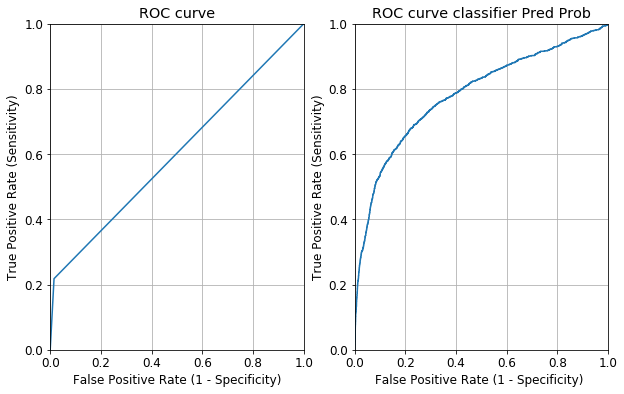

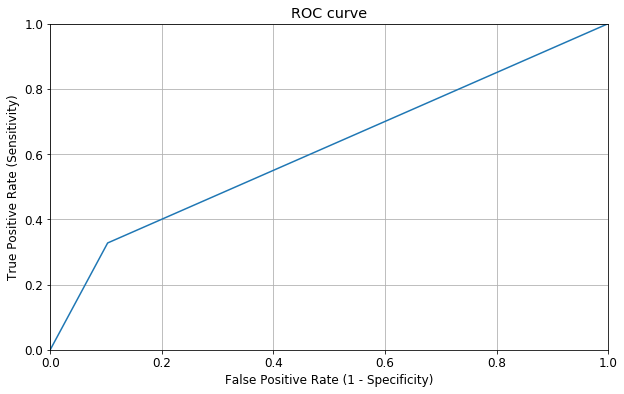

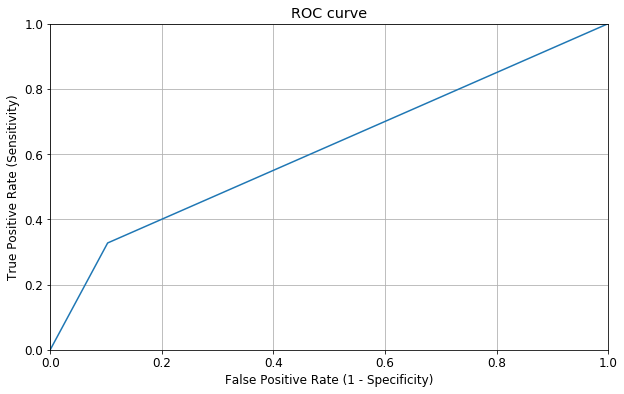

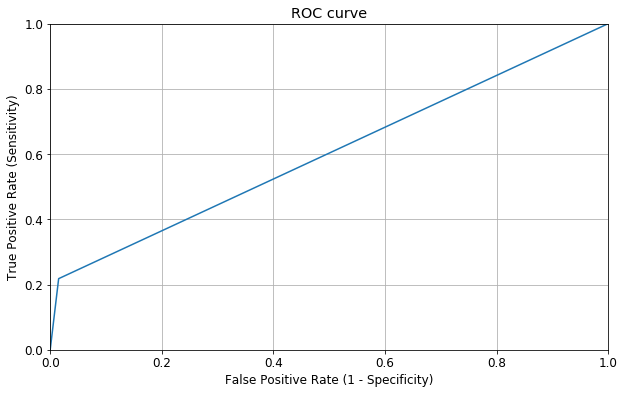

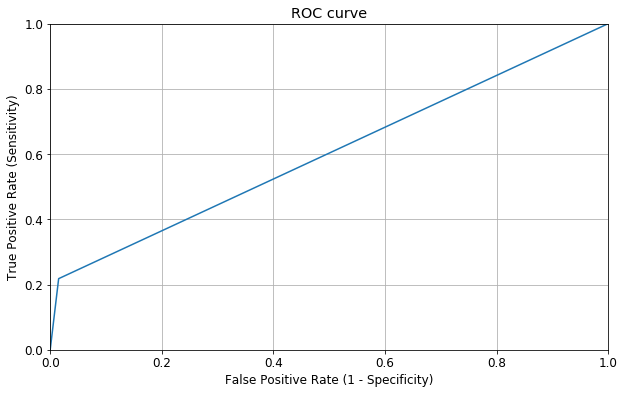

In [287]:
#X_sample6, X_test, y_sample6, y_test = overSamplingSMOT(X_train,y_train)
logistic(X_train,y_train)
dec_tree(X_train,y_train)
rand_for(X_train,y_train)

In [279]:
# Oversampling by smote
from imblearn.over_sampling import SMOTE
def overSamplingSMOT(indDf,pendDf) :
    smote = SMOTE(random_state=9, kind="borderline2")
    X_sample6, y_sample6 = smote.fit_sample(indDf, pendDf)
    sns.countplot(y_sample6)
    return X_sample6, X_test, y_sample6, y_test

LOGISTIC REGRESSION
Training
Accuracy  0.755506174782
Classification report               precision    recall  f1-score   support

        0.0       0.79      0.74      0.76     27029
        1.0       0.72      0.77      0.75     23823

avg / total       0.76      0.76      0.76     50852

Testing
Confusion Matrix:  [[8541 2358]
 [ 455  925]]
TP: 925
TN: 8541
FP: 2358
FN: 455
***************************************************************************
Classification Report : 
              precision    recall  f1-score   support

        0.0       0.95      0.78      0.86     10899
        1.0       0.28      0.67      0.40      1380

avg / total       0.87      0.77      0.81     12279

***************************************************************************
Classification Accuracy: 77.09% 
Classification Error: 0.229090316801
***************************************************************************
Specificity or TNR:  0.783649876135
False negative rate or FNR:  0.329710144928
*

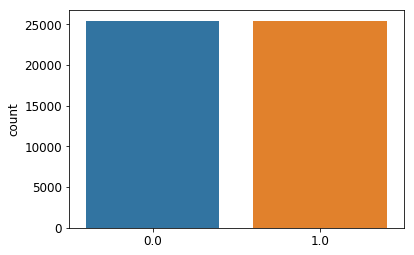

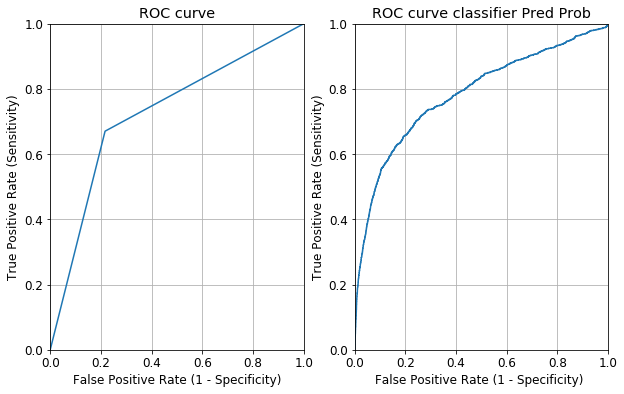

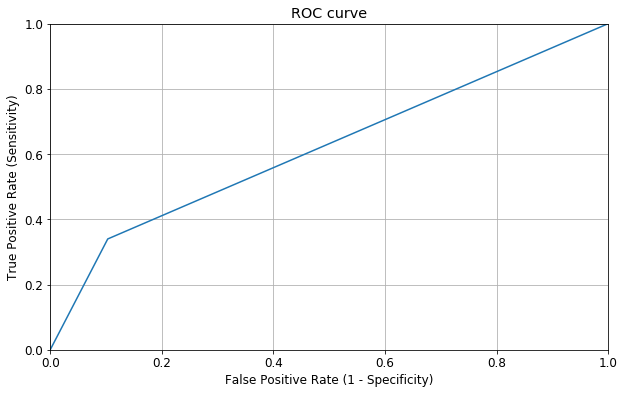

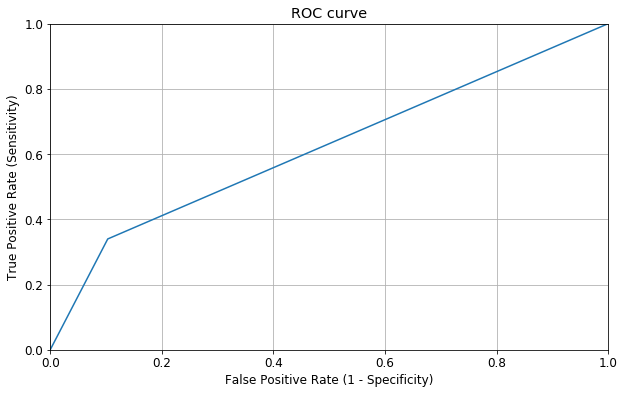

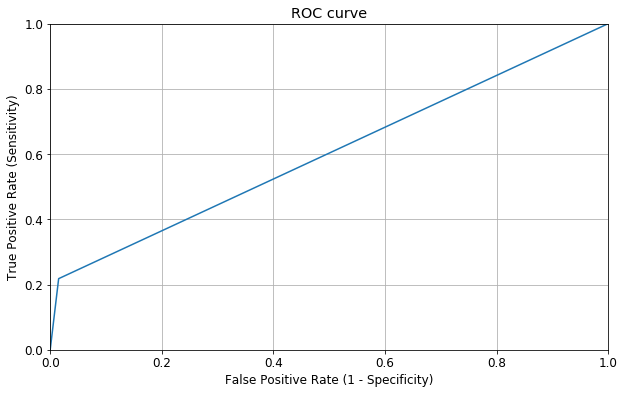

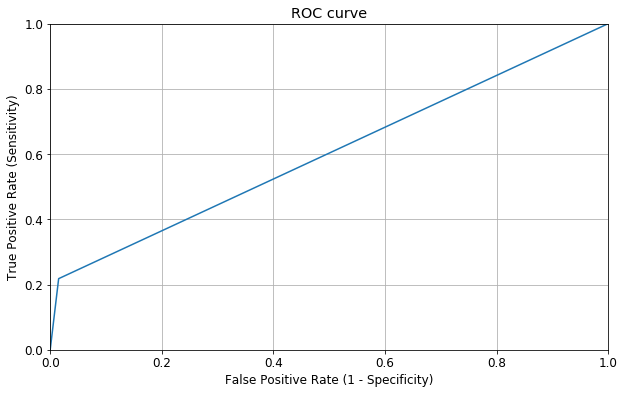

In [280]:
X_sample6, X_test, y_sample6, y_test = overSamplingSMOT(X_train,y_train)
logistic(X_sample6,y_sample6)
dec_tree(X_sample6,y_sample6)
rand_for(X_sample6,y_sample6)
bag_lr_clf(X_sample6,y_sample6)


RANDOM FOREST
Training
Accuracy  0.9938645481
Classification report               precision    recall  f1-score   support

        0.0       1.00      0.99      0.99     25662
        1.0       0.99      1.00      0.99     25190

avg / total       0.99      0.99      0.99     50852

Testing
Confusion Matrix:  [[10734   165]
 [ 1079   301]]
TP: 301
TN: 10734
FP: 165
FN: 1079
***************************************************************************
Classification Report : 
              precision    recall  f1-score   support

        0.0       0.91      0.98      0.95     10899
        1.0       0.65      0.22      0.33      1380

avg / total       0.88      0.90      0.88     12279

***************************************************************************
Classification Accuracy: 89.87% 
Classification Error: 0.101311181692
***************************************************************************
Specificity or TNR:  0.984860996422
False negative rate or FNR:  0.781884057971
****

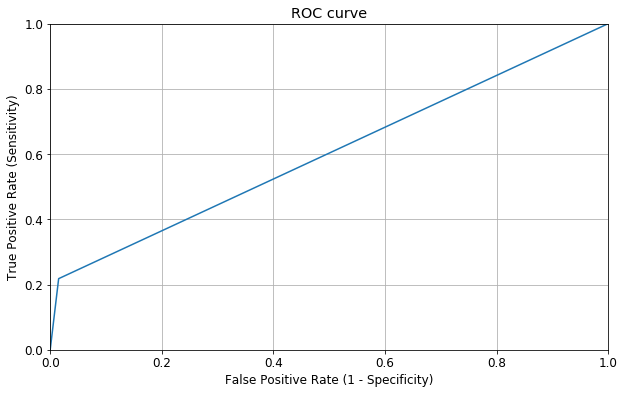

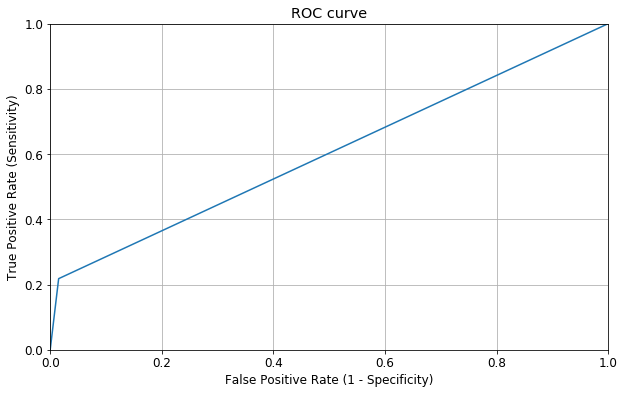

In [281]:
rand_for(X_sample6,y_sample6)

In [233]:
from imblearn.under_sampling import RandomUnderSampler# Create the samplers

def under_sampling(indDf,pendDf) :
    rus = RandomUnderSampler(random_state=9)
    X_sample2, y_sample2 =  rus.fit_sample(X_train, y_train)
    sns.countplot(y_sample2)
    return X_sample2, X_test, y_sample2, y_test

LOGISTIC REGRESSION
Training
Accuracy  0.730446927374
Classification report               precision    recall  f1-score   support

        0.0       0.81      0.70      0.75      3709
        1.0       0.65      0.77      0.71      2735

avg / total       0.74      0.73      0.73      6444

Testing
Confusion Matrix:  [[8591 2308]
 [ 464  916]]
TP: 916
TN: 8591
FP: 2308
FN: 464
***************************************************************************
Classification Report : 
              precision    recall  f1-score   support

        0.0       0.95      0.79      0.86     10899
        1.0       0.28      0.66      0.40      1380

avg / total       0.87      0.77      0.81     12279

***************************************************************************
Classification Accuracy: 77.42% 
Classification Error: 0.225751282678
***************************************************************************
Specificity or TNR:  0.788237452977
False negative rate or FNR:  0.336231884058
*

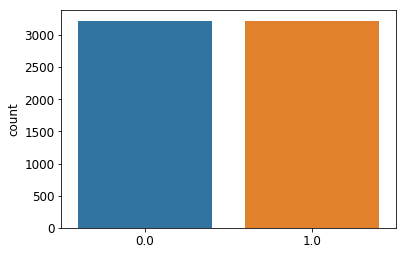

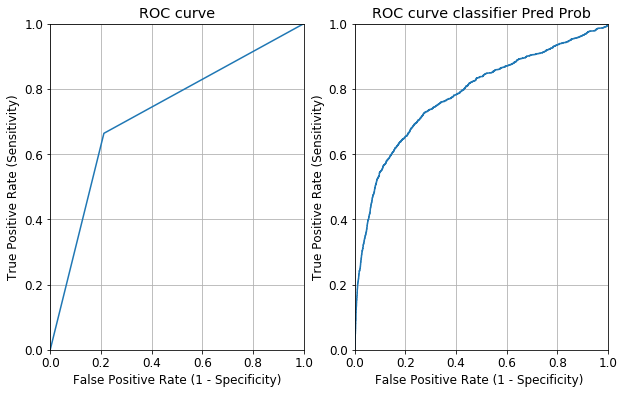

In [284]:
X_sample6, X_test, y_sample6, y_test = under_sampling(X_train,y_train)
logistic(X_sample6,y_sample6)


DECISION TREE
Training
Accuracy  0.601955307263
Classification report               precision    recall  f1-score   support

        0.0       0.98      0.56      0.71      5685
        1.0       0.22      0.93      0.36       759

avg / total       0.89      0.60      0.67      6444

Testing
Confusion Matrix:  [[6894 4005]
 [ 480  900]]
TP: 900
TN: 6894
FP: 4005
FN: 480
***************************************************************************
Classification Report : 
              precision    recall  f1-score   support

        0.0       0.93      0.63      0.75     10899
        1.0       0.18      0.65      0.29      1380

avg / total       0.85      0.63      0.70     12279

***************************************************************************
Classification Accuracy: 63.47% 
Classification Error: 0.365257757146
***************************************************************************
Specificity or TNR:  0.632535094963
False negative rate or FNR:  0.347826086957
*******

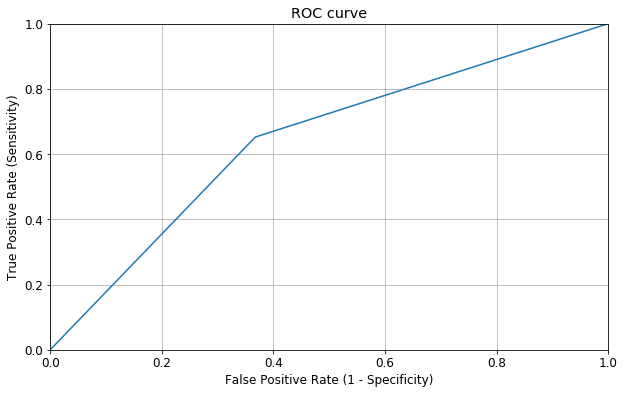

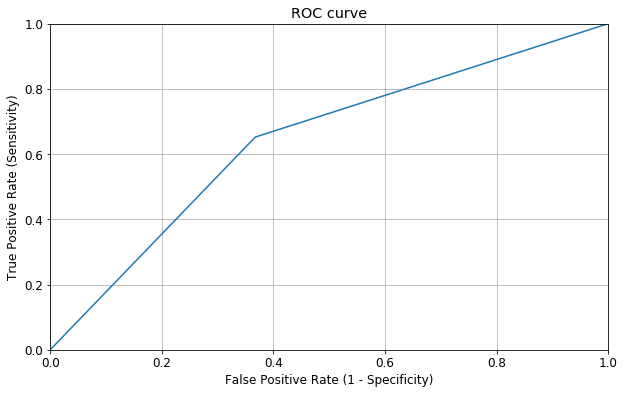

In [285]:
dec_tree(X_sample6,y_sample6)


RANDOM FOREST
Training
Accuracy  0.97982619491
Classification report               precision    recall  f1-score   support

        0.0       0.99      0.97      0.98      3300
        1.0       0.97      0.99      0.98      3144

avg / total       0.98      0.98      0.98      6444

Testing
Confusion Matrix:  [[10734   165]
 [ 1079   301]]
TP: 301
TN: 10734
FP: 165
FN: 1079
***************************************************************************
Classification Report : 
              precision    recall  f1-score   support

        0.0       0.91      0.98      0.95     10899
        1.0       0.65      0.22      0.33      1380

avg / total       0.88      0.90      0.88     12279

***************************************************************************
Classification Accuracy: 89.87% 
Classification Error: 0.101311181692
***************************************************************************
Specificity or TNR:  0.984860996422
False negative rate or FNR:  0.781884057971
***

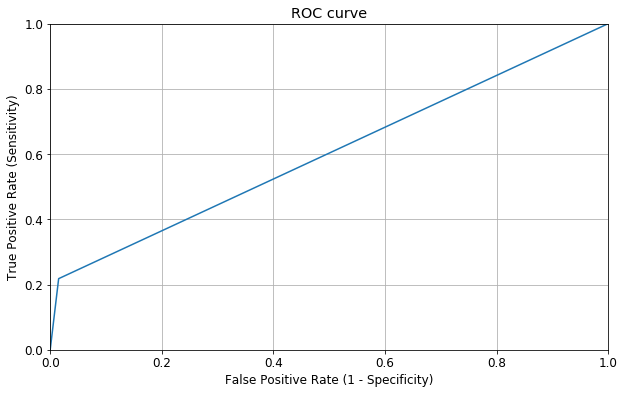

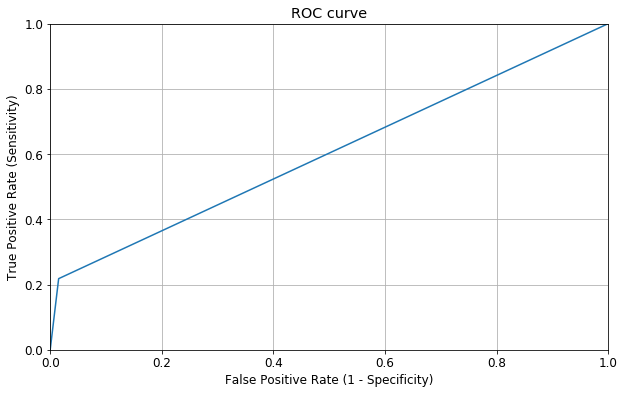

In [286]:
rand_for(X_sample6,y_sample6)

In [277]:
bank_df.drop('duration',axis=1, inplace=True)

In [194]:
# LOGISTIC REGRESSION
def logistic(X_train,y_train):
    print('LOGISTIC REGRESSION')
    model = LogisticRegression(random_state=9)
    model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    print('Training')
    print('Accuracy ',accuracy_score(y_pred_train,y_train))
    print('Classification report ',classification_report(y_pred_train,y_train))
    print('Testing')
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)
    log_metrics_info(y_test,y_pred,y_pred_prob)

In [196]:
# Decision Tree
def dec_tree(X_train,y_train):
    print('DECISION TREE')
    dt_clf = DecisionTreeClassifier(random_state=9)
    dt_clf.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    print('Training')
    print('Accuracy ',accuracy_score(y_pred_train,y_train))
    print('Classification report ',classification_report(y_pred_train,y_train))
    print('Testing')
    y_pred = dt_clf.predict(X_test)
    metrics_info(y_test,y_pred)
    roc_auc_metrics(y_test,y_pred)

In [200]:
def rand_for(X_train,y_train):
    # Random Forest
    print('RANDOM FOREST')
    model = RandomForestClassifier(random_state=9)
    model.fit(X_train,y_train)    
    y_pred_train = model.predict(X_train)
    print('Training')
    print('Accuracy ',accuracy_score(y_pred_train,y_train))
    print('Classification report ',classification_report(y_pred_train,y_train))
    print('Testing')
    metrics_info(y_test,y_pred)
    roc_auc_metrics(y_test,y_pred)

BAGGING CLASSIFIER WITH LOGISTIC REGRESSION
Training
Accuracy  0.90753008914
Classification report               precision    recall  f1-score   support

          0       0.97      0.93      0.95     26750
          1       0.41      0.64      0.50      2081

avg / total       0.93      0.91      0.92     28831

Testing
Confusion Matrix:  [[10631   317]
 [  819   590]]
TP: 590
TN: 10631
FP: 317
FN: 819
***************************************************************************
Classification Report : 
              precision    recall  f1-score   support

          0       0.93      0.97      0.95     10948
          1       0.65      0.42      0.51      1409

avg / total       0.90      0.91      0.90     12357

***************************************************************************
Classification Accuracy: 90.81% 
Classification Error: 0.0919316986324
***************************************************************************
Specificity or TNR:  0.971044939715
False negative ra

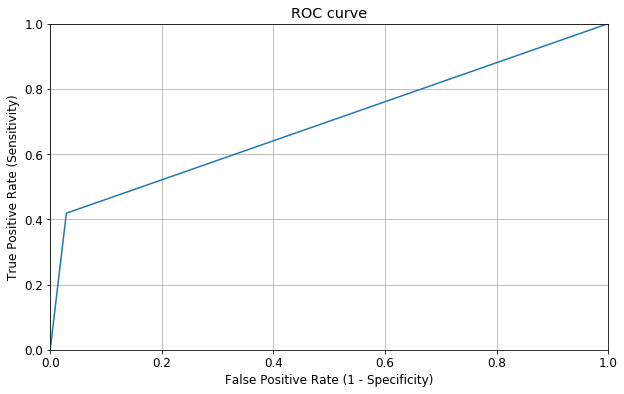

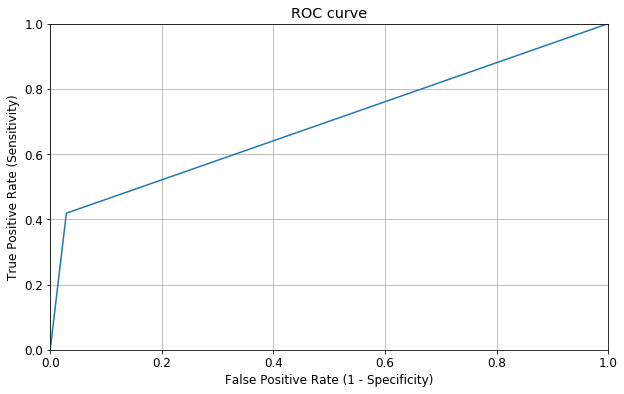

In [155]:
# Bagging Classifier with Logistic Regression
print('BAGGING CLASSIFIER WITH LOGISTIC REGRESSION')
# Fitting bagging classifier with Logisitc Regression
model = BaggingClassifier(LogisticRegression(), n_estimators=100, max_samples=100, 
                            bootstrap=True, random_state=9)# n_estimators=100 models
y_pred = split_fit_predict(model,X_train,y_train)
y_pred_train = model.predict(X_train)
print('Training')
print('Accuracy ',accuracy_score(y_pred_train,y_train))
print('Classification report ',classification_report(y_pred_train,y_train))
print('Testing')
metrics_info(y_test,y_pred)
roc_auc_metrics(y_test,y_pred)

BAGGING CLASSIFIER WITH DECISION TREE
Confusion Matrix:  [[10737   211]
 [  929   480]]
TP: 480
TN: 10737
FP: 211
FN: 929
***************************************************************************
Classification Report : 
              precision    recall  f1-score   support

          0       0.92      0.98      0.95     10948
          1       0.69      0.34      0.46      1409

avg / total       0.89      0.91      0.89     12357

***************************************************************************
Classification Accuracy: 90.77% 
Classification Error: 0.0922554017966
***************************************************************************
Specificity or TNR:  0.980727073438
False negative rate or FNR:  0.659332860185
***************************************************************************
ROC Curve (TPR vs FPR)
False positive rate or FPR:  0.0192729265619
Recall (recall_score) or sensitivity or TPR:  0.340667139815
*****************************************************

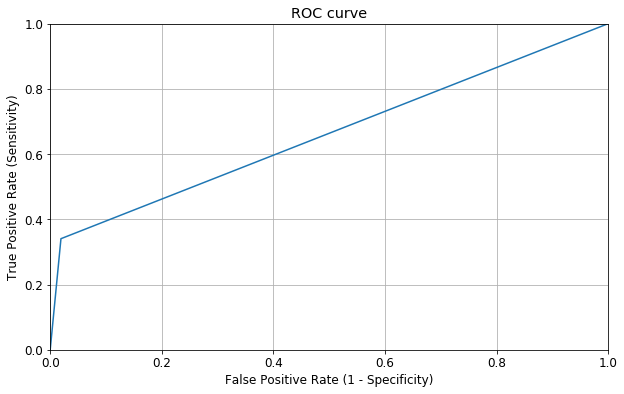

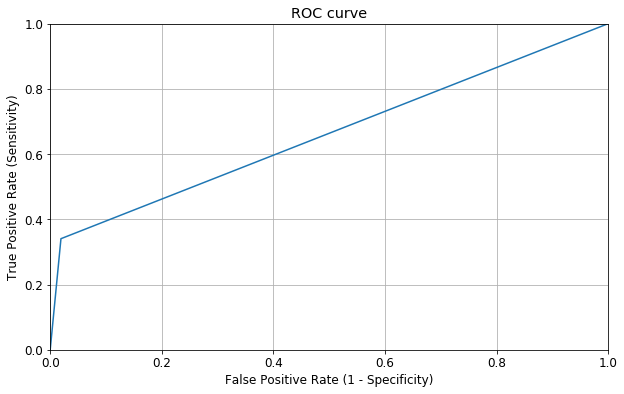

In [52]:
# Bagging Classifier with decision Tree
print('BAGGING CLASSIFIER WITH DECISION TREE')
# Fitting bagging classifier with Decision Tree
model = BaggingClassifier(DecisionTreeClassifier(), n_estimators=100, max_samples=100, 
                            bootstrap=True, random_state=9)# n_estimators=100 models
y_pred = split_fit_predict(model,X_train,y_train)
metrics_info(y_test,y_pred)
roc_auc_metrics(y_test,y_pred)

Training
Accuracy  0.90926433353
Classification report               precision    recall  f1-score   support

          0       0.98      0.93      0.95     27000
          1       0.38      0.67      0.48      1831

avg / total       0.94      0.91      0.92     28831

Testing
Confusion Matrix:  [[10668   280]
 [  890   519]]
TP: 519
TN: 10668
FP: 280
FN: 890
***************************************************************************
Classification Report : 
              precision    recall  f1-score   support

          0       0.92      0.97      0.95     10948
          1       0.65      0.37      0.47      1409

avg / total       0.89      0.91      0.89     12357

***************************************************************************
Classification Accuracy: 90.53% 
Classification Error: 0.094683175528
***************************************************************************
Specificity or TNR:  0.97442455243
False negative rate or FNR:  0.631653655075
*******************

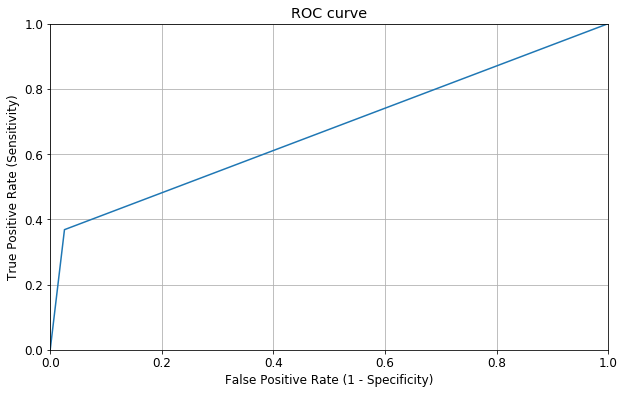

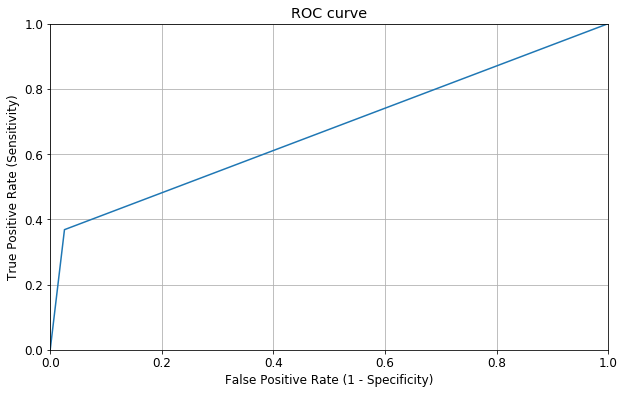

In [156]:
# AdaBoosting
model  = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                             n_estimators=50,
                             algorithm="SAMME.R", 
                             learning_rate=0.5, 
                             random_state=42)
y_pred = split_fit_predict(model,X_train,y_train)
y_pred_train = model.predict(X_train)
print('Training')
print('Accuracy ',accuracy_score(y_pred_train,y_train))
print('Classification report ',classification_report(y_pred_train,y_train))
print('Testing')
metrics_info(y_test,y_pred)
roc_auc_metrics(y_test,y_pred)

Training
Accuracy  0.920328812736
Classification report               precision    recall  f1-score   support

          0       0.97      0.94      0.96     26469
          1       0.51      0.70      0.59      2362

avg / total       0.93      0.92      0.93     28831

Testing
Confusion Matrix:  [[10634   314]
 [  713   696]]
TP: 696
TN: 10634
FP: 314
FN: 713
***************************************************************************
Classification Report : 
              precision    recall  f1-score   support

          0       0.94      0.97      0.95     10948
          1       0.69      0.49      0.58      1409

avg / total       0.91      0.92      0.91     12357

***************************************************************************
Classification Accuracy: 91.69% 
Classification Error: 0.0831107874079
***************************************************************************
Specificity or TNR:  0.971318962368
False negative rate or FNR:  0.506032647268
****************

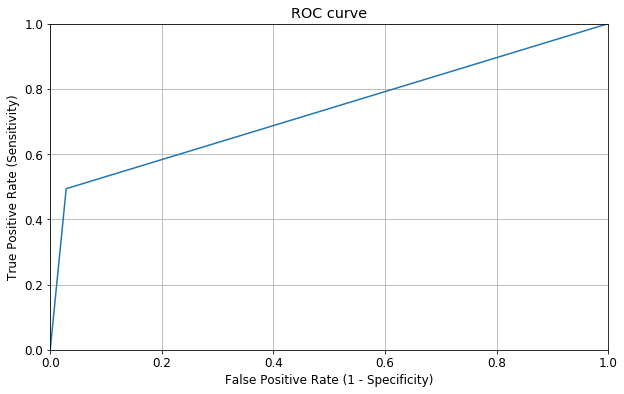

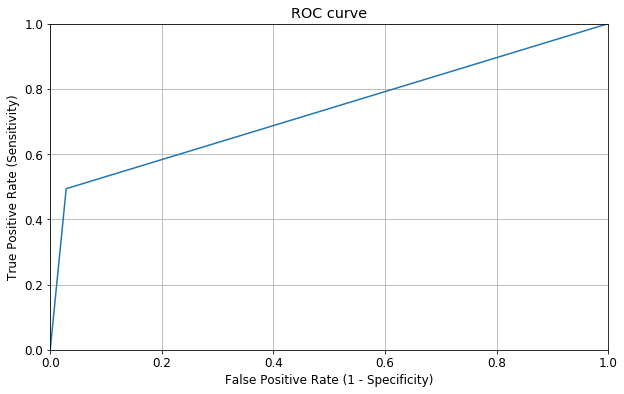

In [157]:
# XGboost
model = XGBClassifier()
y_pred = split_fit_predict(model,X_train,y_train)
y_pred_train = model.predict(X_train)
print('Training')
print('Accuracy ',accuracy_score(y_pred_train,y_train))
print('Classification report ',classification_report(y_pred_train,y_train))
print('Testing')
metrics_info(y_test,y_pred)
roc_auc_metrics(y_test,y_pred)

In [55]:
from sklearn.grid_search import GridSearchCV

In [ ]:
param_grid = dict()

In [63]:
def gridfunc(classifier,parameter,X_train,y_train):
    
    clf = classifier
    parameters = parameter
#    acc_sc = make_scorer(accuracy_score)
    
    grid_obj = GridSearchCV(clf, parameters, X_train,y_train)
    grid_obj.fit(X_train,y_train)
    
    return grid_obj

In [57]:
#plot mean scores for a particular grid object

def hp_cv_scores(grid_obj):
    grid_obj.cv_results_
    mean_test_scores = grid_obj.cv_results_['mean_test_score']# accuracy score for test data
    mean_train_scores = grid_obj.cv_results_['mean_train_score']# accuracy score for train data
    plt.figure(figsize=(10,6))
    
    param_values =[str(x) for x in list(grid_obj.param_grid.items())[0][1]]
    x = np.arange(1, len(param_values)+1)
    
    plt.plot(x,mean_train_scores, c='r', label='Train set')
    plt.xticks(x,param_values)
    plt.plot(x,mean_test_scores,c='g', label='Test set')
    plt.xlabel(list(grid_obj.param_grid.items())[0][1])
    plt.ylabel('mean scores')
    plt.legend()
    plt.show()

In [58]:
classifier = RandomForestClassifier(random_state=9)
parameter = {'n_estimators': [10,50,100], 
              'max_features': ['log2', 'sqrt'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': [2,4,6], 
              'min_samples_split': [2, 3, 5],
              'min_samples_leaf': [1,3,5]
             }

In [64]:
#task find the results for the given params
grid = gridfunc(classifier, parameter, X_train, y_train)

ValueError: scoring value should either be a callable, string or None.        age  job  marital  education  default  housing  loan  contact  month  \
27983   49    0        1          1        0        2     0        0      0   
12500   28    0        2          6        1        2     0        0      3   
981     55    1        1          0        0        2     2        1      6   
22105   34    9        1          5        0        2     0        0      1   
13023   36    0        1          6        0        2     0        0      3   
26161   53    1        0          0        0        2     0        0      7   
20586   47    0        0          3        0        0     0        0      1   
36577   33    4        0          6        0        2     0        0      4   
24444   32    0        2          3        0        2     0        0      7   
28433   48    1        1          0        1        2     0        0      0   
20000   42    6        1          6        0        2     0        0      1   
14135   26    1        0          3        0        0     0        1      3   
37966   54    0        1          6        0        0     2        0      9   
20511   35    4        1          6        0        2     0        0      1   
33635   41    7        1          3        0        2     2        0      6   
23972   33   10        1          6        0        2     0        0      1   
17638   57    0        1          6        1        2     0        0      3   
35754   32    7        1          3        1        2     0        0      6   
17197   55    4        1          2        0        2     0        1      3   
39783   29    1        2          2        0        0     0        1      4   
35777   43    1        1          0        0        2     0        0      6   
33099   47    1        1          2        0        0     0        0      6   
22459   34    9        1          3        0        2     0        0      1   
15527   39    1        2          0        1        2     0        1      3   
26079   39    7        0          3        0        2     0        0      7   
12290   46    6        1          3        1        2     0        1      3   
24579   37    2        1          6        1        0     0        0      7   
10076   28    4        2          6        0        0     0        1      4   
21341   37    0        1          6        0        2     0        0      1   
3648    25    1        2          0        0        0     0        1      6   
...    ...  ...      ...        ...      ...      ...   ...      ...    ...   
19731   56    0        1          0        0        0     0        0      1   
16779   27    1        2          1        0        0     0        0      3   
10979   28    4        1          6        0        2     0        1      4   
36792   33    1        0          7        0        0     0        0      4   
18561   36    2        1          6        1        2     0        0      3   
3768    33    0        0          3        0        2     0        1      6   
6358    50    0        2          6        0        0     0        1      6   
6418    50    4        2          6        0        1     1        1      6   
23160   48    7        1          0        1        2     0        0      1   
14570   34    9        0          5        0        0     0        0      3   
25406   42    0        1          3        0        0     0        0      7   
36810   27    7        2          6        0        2     0        0      4   
27096   29    0        2          5        0        0     0        1      7   
36027   29    6        1          6        0        0     0        0      6   
24814   58    9        1          7        0        0     0        0      7   
17340   44    9        0          6        1        2     2        1      3   
16256   58    5        1          0        0        0     0        0      3   
19420   43    0        2          6        0        2     2        0      1   
39259   27    7        2          6        0        0     0        0      5   
10481   50    9        1          5        0        2     0        1      4   
36602   30    0        2          6        0        0     0        0      4   
23099   41    9        2          5        0        2     0        0      1   
37300   46    1        1          5        0        0     0        1      1   
30230   35    9        1          5        0        0     0        0      0   
4673    41    9        1          6        0        0     0        1      6   
25725   32    9        1          6        0        2     0        0      7   
5014    40    0        2          7        1        2     0        1      6   
22584   30    9        2          6        0        0     2        0      1   
501     33    0        1          2        0        1     1        1      6   
20828   31    9        2          5        0        2     0        0      1   

       day_of_week  duration  campaign  pdays  previous  poutcome  \
27983            4       805         2    999         1         0   
12500            1       248         3    999         0         1   
981              4      1101         1    999         0         1   
22105            2       286         9    999         0         1   
13023            3       218         3    999         0         1   
26161            4       206         5    999         0         1   
20586            3       204         6    999         0         1   
36577            4       187         1    999         0         1   
24444            1        92         1    999         1         0   
28433            2       627         2      5         3         0   
20000            0       219         2    999         0         1   
14135            1        79         3    999         0         1   
37966            0       172         1    999         0         1   
20511            3       284         1    999         0         1   
33635            4        21         8    999         0         1   
23972            0        53         2    999         0         1   
17638            1       194        24    999         0         1   
35754            1       536         2    999         0         1   
17197            0       106         3    999         0         1   
39783            3      1563         1      6         2         2   
35777            1       128         3    999         0         1   
33099            3       234         2    999         1         0   
22459            0       107         1    999         0         1   
15527            0       129         2    999         0         1   
26079            4       222         3    999         1         0   
12290            0       121         1    999         0         1   
24579            1        94         2    999         1         0   
10076            2       651         5    999         0         1   
21341            1       395         3    999         0         1   
3648             0       196         1    999         0         1   
...            ...       ...       ...    ...       ...       ...   
19731            2        82         3    999         0         1   
16779            2       326         1    999         0         1   
10979            4       695         1    999         0         1   
36792            1        84         5    999         0         1   
18561            2        55         7    999         0         1   
3768             0       290         1    999         0         1   
6358             3       101         3    999         0         1   
6418             4       372         2    999         0         1   
23160            3      1000         3    999         0         1   
14570            3       116         5    999         0         1   
25406            3       203         1    999         0         1   
36810            1        41         2    999         0         1   
27096            0       346         4    999         1         0   
36027            3       376         2    999         0         1   
24814            3        82         1    999         0         1   
17340            1        31         3    999         0         1   
16256            3       139         2    999         0         1   
19420            4        79         3    999         0         1   
39259            0       212         1    999         0         1   
10481            3        78         5    999         0         1   
36602            2       323         1    999         0         1   
23099            3       179         1    999         0         1   
37300            1       151         3    999         1         0   
30230            2       337         2      5         1         2   
4673             4       162         1    999         0         1   
25725            4       405         2    999         0         1   
5014             4        30        12    999         0         1   
22584            0        81         2    999         0         1   
501              3        80         1    999         0         1   
20828            4       449         3    999         0         1   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
27983          -1.8          93.075          -47.1      1.498       5099.1  
12500           1.4          93.918          -42.7      4.960       5228.1  
981             1.1          93.994          -36.4      4.856       5191.0  
22105           1.4          93.444          -36.1      4.963       5228.1  
13023           1.4          93.918          -42.7      4.962       5228.1  
26161          -0.1          93.200          -42.0      4.120       5195.8  
20586           1.4          93.444          -36.1      4.966       5228.1  
36577          -2.9          92.963          -40.8      1.260       5076.2  
24444          -0.1          93.200          -42.0      4.191       5195.8  
28433          -1.8          93.075          -47.1      1.435       5099.1  
20000           1.4          93.444          -36.1      4.966       5228.1  
14135           1.4          93.918          -42.7      4.962       5228.1  
37966          -3.4          92.379          -29.8      0.803       5017.5  
20511           1.4          93.444          -36.1      4.966       5228.1  
33635          -1.8          92.893          -46.2      1.281       5099.1  
23972           1.4          93.444          -36.1      4.963       5228.1  
17638           1.4          93.918          -42.7      4.962       5228.1  
35754          -1.8          92.893          -46.2      1.244       5099.1  
17197           1.4          93.918          -42.7      4.962       5228.1  
39783          -1.7          94.055          -39.8      0.702       4991.6  
35777          -1.8          92.893          -46.2      1.244       5099.1  
33099          -1.8          92.893          -46.2      1.291       5099.1  
22459           1.4          93.444          -36.1      4.964       5228.1  
15527           1.4          93.918          -42.7      4.957       5228.1  
26079          -0.1          93.200          -42.0      4.120       5195.8  
12290           1.4          93.918          -42.7      4.959       5228.1  
24579          -0.1          93.200          -42.0      4.191       5195.8  
10076           1.4          94.465          -41.8      4.958       5228.1  
21341           1.4          93.444          -36.1      4.963       5228.1  
3648            1.1          93.994          -36.4      4.859       5191.0  
...             ...             ...            ...        ...          ...  
19731           1.4          93.444          -36.1      4.968       5228.1  
16779           1.4          93.918          -42.7      4.962       5228.1  
10979           1.4          94.465          -41.8      4.962       5228.1  
36792          -2.9          92.963          -40.8      1.260       5076.2  
18561           1.4          93.918          -42.7      4.968       5228.1  
3768            1.1          93.994          -36.4      4.859       5191.0  
6358            1.1          93.994          -36.4      4.857       5191.0  
6418            1.1          93.994          -36.4      4.857       5191.0  
23160           1.4          93.444          -36.1      4.965       5228.1  
14570           1.4          93.918          -42.7      4.961       5228.1  
25406          -0.1          93.200          -42.0      4.153       5195.8  
36810          -2.9          92.963          -40.8      1.260       5076.2  
27096          -0.1          93.200          -42.0      4.021       5195.8  
36027          -1.8          92.893          -46.2      1.266       5099.1  
24814          -0.1          93.200          -42.0      4.153       5195.8  
17340           1.4          93.918          -42.7      4.962       5228.1  
16256           1.4          93.918          -42.7      4.961       5228.1  
19420           1.4          93.444          -36.1      4.967       5228.1  
39259          -1.8          93.369          -34.8      0.649       5008.7  
10481           1.4          94.465          -41.8      4.961       5228.1  
36602          -2.9          92.963          -40.8      1.260       5076.2  
23099           1.4          93.444          -36.1      4.965       5228.1  
37300          -2.9          92.201          -31.4      0.884       5076.2  
30230          -1.8          93.075          -47.1      1.365       5099.1  
4673            1.1          93.994          -36.4      4.858       5191.0  
25725          -0.1          93.200          -42.0      4.120       5195.8  
5014            1.1          93.994          -36.4      4.858       5191.0  
22584           1.4          93.444          -36.1      4.964       5228.1  
501             1.1          93.994          -36.4      4.857       5191.0  
20828           1.4          93.444          -36.1      4.965       5228.1  

[28831 rows x 20 columns] was passed

# Phase 2

In [236]:
bank_df = pd.read_csv('Hackathon/bank-additional/bank-additional/bank-additional-full.csv')
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [237]:
bank_df.isin(['unknown']).sum()

age                  0
job                330
marital             80
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

In [238]:
bank_df[bank_df.marital =='married'].age.describe()

count    24928.000000
mean        42.307165
std         10.018179
min         20.000000
25%         34.000000
50%         41.000000
75%         49.000000
max         98.000000
Name: age, dtype: float64

(array([  731.,  6686.,  7122.,  5519.,  3587.,   894.,   224.,   125.,
           32.,     8.]),
 array([ 20. ,  27.8,  35.6,  43.4,  51.2,  59. ,  66.8,  74.6,  82.4,
         90.2,  98. ]),
 <a list of 10 Patch objects>)

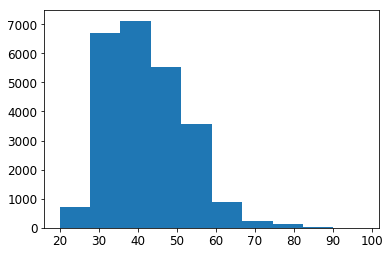

In [239]:
plt.hist(bank_df[bank_df.marital =='married'].age)

In [240]:
bank_df[bank_df.marital =='single'].age.describe()

count    11568.000000
mean        33.158714
std          7.534553
min         17.000000
25%         28.000000
50%         32.000000
75%         37.000000
max         86.000000
Name: age, dtype: float64

(array([  5.50000000e+02,   4.20100000e+03,   4.24700000e+03,
          1.61200000e+03,   6.17000000e+02,   2.82000000e+02,
          3.40000000e+01,   1.80000000e+01,   3.00000000e+00,
          4.00000000e+00]),
 array([ 17. ,  23.9,  30.8,  37.7,  44.6,  51.5,  58.4,  65.3,  72.2,
         79.1,  86. ]),
 <a list of 10 Patch objects>)

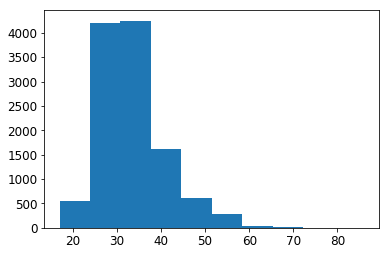

In [241]:
plt.hist(bank_df[bank_df.marital =='single'].age)

In [242]:
bank_df[bank_df.marital =='married'].age.median()


41.0

In [243]:
bank_df[bank_df.marital =='married'].age.mean()

42.30716463414634

In [244]:
bank_df[bank_df.marital =='divorced'].age.describe()

count    4612.000000
mean       44.899393
std        10.625599
min        24.000000
25%        37.000000
50%        44.000000
75%        52.000000
max        95.000000
Name: age, dtype: float64

(array([  370.,  1058.,  1125.,  1001.,   834.,    71.,    46.,    52.,
           33.,    22.]),
 array([ 24. ,  31.1,  38.2,  45.3,  52.4,  59.5,  66.6,  73.7,  80.8,
         87.9,  95. ]),
 <a list of 10 Patch objects>)

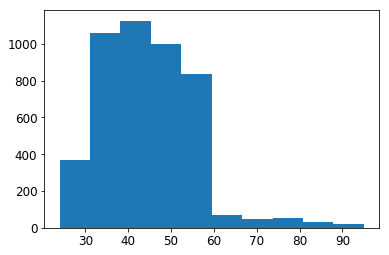

In [245]:
plt.hist(bank_df[bank_df.marital =='divorced'].age)

In [246]:
bank_df.loc[(bank_df['marital']  == 'unknown') & (bank_df['age']  >= 42), 'marital'] = 'married'
bank_df.loc[(bank_df['marital']  == 'unknown') & (bank_df['age']  < 42), 'marital'] = 'single'

In [247]:
bank_df.isin(['unknown']).sum()

age                  0
job                330
marital              0
education         1731
default           8597
housing            990
loan               990
contact              0
month                0
day_of_week          0
duration             0
campaign             0
pdays                0
previous             0
poutcome             0
emp.var.rate         0
cons.price.idx       0
cons.conf.idx        0
euribor3m            0
nr.employed          0
y                    0
dtype: int64

# Job

In [248]:
bank_df.job.value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [249]:
job_edu_crosstab = pd.crosstab(index=bank_df.job,columns=bank_df.education)

job_edu_crosstab
#bank_crosstab.plot(kind="bar", figsize=(12,8), stacked=True, colormap='Paired')

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249
blue-collar,2318,1426,3623,878,8,453,94,454
entrepreneur,137,71,210,234,2,135,610,57
housemaid,474,77,94,174,1,59,139,42
management,100,85,166,298,0,89,2063,123
retired,597,75,145,276,3,241,285,98
self-employed,93,25,220,118,3,168,765,29
services,132,226,388,2682,0,218,173,150
student,26,13,99,357,0,43,170,167


In [250]:
job_edu_crosstab.head()

education,basic.4y,basic.6y,basic.9y,high.school,illiterate,professional.course,university.degree,unknown
job,,,,,,,,
admin.,77,151,499,3329,1,363,5753,249
blue-collar,2318,1426,3623,878,8,453,94,454
entrepreneur,137,71,210,234,2,135,610,57
housemaid,474,77,94,174,1,59,139,42
management,100,85,166,298,0,89,2063,123


In [251]:
# Clubbing education into similar education
edu_Job_df = pd.crosstab(index=bank_df.job,columns=bank_df.education);

bank_df_df =  edu_Job_df["basic.4y"] + edu_Job_df["basic.6y"] +edu_Job_df["basic.9y"] +edu_Job_df["high.school"] 

bank_df =  bank_df.copy();

bank_df['education'] = bank_df['education'].map({'basic.4y': 'basic', 'basic.6y': 'basic' , 'basic.9y': 'basic', 

                                           'high.school': 'basic' ,'illiterate':'illiterate',

                                          'professional.course' : 'professional.course',

                                           'university.degree':'university.degree',

                                            'unknown':'unknown'})

print(bank_df['education'])

0                      basic
1                      basic
2                      basic
3                      basic
4                      basic
5                      basic
6        professional.course
7                    unknown
8        professional.course
9                      basic
10                   unknown
11                     basic
12                     basic
13                     basic
14                     basic
15                     basic
16                     basic
17                     basic
18                     basic
19                     basic
20                     basic
21                     basic
22                     basic
23                     basic
24                     basic
25         university.degree
26                   unknown
27                     basic
28         university.degree
29         university.degree
                ...         
41158                  basic
41159                  basic
41160      university.degree
41161      uni

In [252]:
bank_df.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [253]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [254]:
# Imputing unknown values in job and education
drop_index = bank_df[(bank_df.job == 'unknown') & (bank_df.education == 'unknown')]['y'].index

bank_df.drop(drop_index,axis=0,inplace=True)

pd.crosstab(index=bank_df.job,columns=bank_df.education)




education,basic,illiterate,professional.course,university.degree,unknown
job,,,,,
admin.,4056,1,363,5753,249
blue-collar,8245,8,453,94,454
entrepreneur,652,2,135,610,57
housemaid,819,1,59,139,42
management,649,0,89,2063,123
retired,1093,3,241,285,98
self-employed,456,3,168,765,29
services,3428,0,218,173,150
student,495,0,43,170,167


In [255]:
man_index = bank_df[(bank_df.job == 'entrepreneur') & (bank_df.education == 'unknown')]['y'].index

bank_df.loc[man_index, 'education'] = 'basic'

bank_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41057 entries, 0 to 41187
Data columns (total 21 columns):
age               41057 non-null int64
job               41057 non-null object
marital           41057 non-null object
education         41057 non-null object
default           41057 non-null object
housing           41057 non-null object
loan              41057 non-null object
contact           41057 non-null object
month             41057 non-null object
day_of_week       41057 non-null object
duration          41057 non-null int64
campaign          41057 non-null int64
pdays             41057 non-null int64
previous          41057 non-null int64
poutcome          41057 non-null object
emp.var.rate      41057 non-null float64
cons.price.idx    41057 non-null float64
cons.conf.idx     41057 non-null float64
euribor3m         41057 non-null float64
nr.employed       41057 non-null float64
y                 41057 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [256]:
pd.crosstab(index=bank_df.job,columns=bank_df.education)

education,basic,illiterate,professional.course,university.degree,unknown
job,,,,,
admin.,4056,1,363,5753,249
blue-collar,8245,8,453,94,454
entrepreneur,709,2,135,610,0
housemaid,819,1,59,139,42
management,649,0,89,2063,123
retired,1093,3,241,285,98
self-employed,456,3,168,765,29
services,3428,0,218,173,150
student,495,0,43,170,167


In [257]:

man_index = bank_df[(bank_df.job == 'retired') & (bank_df.education == 'unknown')]['y'].index

bank_df.loc[man_index, 'education'] = 'basic'

print(bank_df.info())

print(pd.crosstab(index=bank_df.job,columns=bank_df.education))



<class 'pandas.core.frame.DataFrame'>
Int64Index: 41057 entries, 0 to 41187
Data columns (total 21 columns):
age               41057 non-null int64
job               41057 non-null object
marital           41057 non-null object
education         41057 non-null object
default           41057 non-null object
housing           41057 non-null object
loan              41057 non-null object
contact           41057 non-null object
month             41057 non-null object
day_of_week       41057 non-null object
duration          41057 non-null int64
campaign          41057 non-null int64
pdays             41057 non-null int64
previous          41057 non-null int64
poutcome          41057 non-null object
emp.var.rate      41057 non-null float64
cons.price.idx    41057 non-null float64
cons.conf.idx     41057 non-null float64
euribor3m         41057 non-null float64
nr.employed       41057 non-null float64
y                 41057 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [258]:
man_index = bank_df[(bank_df.job == 'self-employed') & (bank_df.education == 'unknown')]['y'].index

bank_df.loc[man_index, 'education'] = 'university.degree'

print(bank_df.info())

print(pd.crosstab(index=bank_df.job,columns=bank_df.education))





<class 'pandas.core.frame.DataFrame'>
Int64Index: 41057 entries, 0 to 41187
Data columns (total 21 columns):
age               41057 non-null int64
job               41057 non-null object
marital           41057 non-null object
education         41057 non-null object
default           41057 non-null object
housing           41057 non-null object
loan              41057 non-null object
contact           41057 non-null object
month             41057 non-null object
day_of_week       41057 non-null object
duration          41057 non-null int64
campaign          41057 non-null int64
pdays             41057 non-null int64
previous          41057 non-null int64
poutcome          41057 non-null object
emp.var.rate      41057 non-null float64
cons.price.idx    41057 non-null float64
cons.conf.idx     41057 non-null float64
euribor3m         41057 non-null float64
nr.employed       41057 non-null float64
y                 41057 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [259]:
man_index = bank_df[(bank_df.job == 'services') & (bank_df.education == 'unknown')]['y'].index

bank_df.loc[man_index, 'education'] = 'professional.course'

print(bank_df.info())

print(pd.crosstab(index=bank_df.job,columns=bank_df.education))





<class 'pandas.core.frame.DataFrame'>
Int64Index: 41057 entries, 0 to 41187
Data columns (total 21 columns):
age               41057 non-null int64
job               41057 non-null object
marital           41057 non-null object
education         41057 non-null object
default           41057 non-null object
housing           41057 non-null object
loan              41057 non-null object
contact           41057 non-null object
month             41057 non-null object
day_of_week       41057 non-null object
duration          41057 non-null int64
campaign          41057 non-null int64
pdays             41057 non-null int64
previous          41057 non-null int64
poutcome          41057 non-null object
emp.var.rate      41057 non-null float64
cons.price.idx    41057 non-null float64
cons.conf.idx     41057 non-null float64
euribor3m         41057 non-null float64
nr.employed       41057 non-null float64
y                 41057 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [260]:
man_index = bank_df[(bank_df.job == 'student') & (bank_df.education == 'unknown')]['y'].index

bank_df.loc[man_index, 'education'] = 'basic'

print(bank_df.info())

print(pd.crosstab(index=bank_df.job,columns=bank_df.education))





<class 'pandas.core.frame.DataFrame'>
Int64Index: 41057 entries, 0 to 41187
Data columns (total 21 columns):
age               41057 non-null int64
job               41057 non-null object
marital           41057 non-null object
education         41057 non-null object
default           41057 non-null object
housing           41057 non-null object
loan              41057 non-null object
contact           41057 non-null object
month             41057 non-null object
day_of_week       41057 non-null object
duration          41057 non-null int64
campaign          41057 non-null int64
pdays             41057 non-null int64
previous          41057 non-null int64
poutcome          41057 non-null object
emp.var.rate      41057 non-null float64
cons.price.idx    41057 non-null float64
cons.conf.idx     41057 non-null float64
euribor3m         41057 non-null float64
nr.employed       41057 non-null float64
y                 41057 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [261]:
man_index = bank_df[(bank_df.job == 'unemployed') & (bank_df.education == 'unknown')]['y'].index

bank_df.loc[man_index, 'education'] = 'basic'

print(bank_df.info())

print(pd.crosstab(index=bank_df.job,columns=bank_df.education))





<class 'pandas.core.frame.DataFrame'>
Int64Index: 41057 entries, 0 to 41187
Data columns (total 21 columns):
age               41057 non-null int64
job               41057 non-null object
marital           41057 non-null object
education         41057 non-null object
default           41057 non-null object
housing           41057 non-null object
loan              41057 non-null object
contact           41057 non-null object
month             41057 non-null object
day_of_week       41057 non-null object
duration          41057 non-null int64
campaign          41057 non-null int64
pdays             41057 non-null int64
previous          41057 non-null int64
poutcome          41057 non-null object
emp.var.rate      41057 non-null float64
cons.price.idx    41057 non-null float64
cons.conf.idx     41057 non-null float64
euribor3m         41057 non-null float64
nr.employed       41057 non-null float64
y                 41057 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [262]:
man_index = bank_df[(bank_df.job == 'unskilled') & (bank_df.education == 'unknown')]['y'].index

bank_df.loc[man_index, 'education'] = 'basic'

print(bank_df.info())

print(pd.crosstab(index=bank_df.job,columns=bank_df.education))








<class 'pandas.core.frame.DataFrame'>
Int64Index: 41057 entries, 0 to 41187
Data columns (total 21 columns):
age               41057 non-null int64
job               41057 non-null object
marital           41057 non-null object
education         41057 non-null object
default           41057 non-null object
housing           41057 non-null object
loan              41057 non-null object
contact           41057 non-null object
month             41057 non-null object
day_of_week       41057 non-null object
duration          41057 non-null int64
campaign          41057 non-null int64
pdays             41057 non-null int64
previous          41057 non-null int64
poutcome          41057 non-null object
emp.var.rate      41057 non-null float64
cons.price.idx    41057 non-null float64
cons.conf.idx     41057 non-null float64
euribor3m         41057 non-null float64
nr.employed       41057 non-null float64
y                 41057 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [263]:
man_index = bank_df[(bank_df.job == 'management') & (bank_df.education == 'unknown')]['y'].index

bank_df.loc[man_index, 'education'] = 'university.degree'

print(bank_df.info())

print(pd.crosstab(index=bank_df.job,columns=bank_df.education))






<class 'pandas.core.frame.DataFrame'>
Int64Index: 41057 entries, 0 to 41187
Data columns (total 21 columns):
age               41057 non-null int64
job               41057 non-null object
marital           41057 non-null object
education         41057 non-null object
default           41057 non-null object
housing           41057 non-null object
loan              41057 non-null object
contact           41057 non-null object
month             41057 non-null object
day_of_week       41057 non-null object
duration          41057 non-null int64
campaign          41057 non-null int64
pdays             41057 non-null int64
previous          41057 non-null int64
poutcome          41057 non-null object
emp.var.rate      41057 non-null float64
cons.price.idx    41057 non-null float64
cons.conf.idx     41057 non-null float64
euribor3m         41057 non-null float64
nr.employed       41057 non-null float64
y                 41057 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [264]:
man_index = bank_df[(bank_df.job == 'admin.') & (bank_df.education == 'unknown')]['y'].index

bank_df.loc[man_index, 'education'] = 'university.degree'

print(bank_df.info())

print(pd.crosstab(index=bank_df.job,columns=bank_df.education))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41057 entries, 0 to 41187
Data columns (total 21 columns):
age               41057 non-null int64
job               41057 non-null object
marital           41057 non-null object
education         41057 non-null object
default           41057 non-null object
housing           41057 non-null object
loan              41057 non-null object
contact           41057 non-null object
month             41057 non-null object
day_of_week       41057 non-null object
duration          41057 non-null int64
campaign          41057 non-null int64
pdays             41057 non-null int64
previous          41057 non-null int64
poutcome          41057 non-null object
emp.var.rate      41057 non-null float64
cons.price.idx    41057 non-null float64
cons.conf.idx     41057 non-null float64
euribor3m         41057 non-null float64
nr.employed       41057 non-null float64
y                 41057 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [265]:
man_index = bank_df[(bank_df.job == 'blue-collar') & (bank_df.education == 'unknown')]['y'].index

bank_df.loc[man_index, 'education'] = 'basic'

print(bank_df.info())

print(pd.crosstab(index=bank_df.job,columns=bank_df.education))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41057 entries, 0 to 41187
Data columns (total 21 columns):
age               41057 non-null int64
job               41057 non-null object
marital           41057 non-null object
education         41057 non-null object
default           41057 non-null object
housing           41057 non-null object
loan              41057 non-null object
contact           41057 non-null object
month             41057 non-null object
day_of_week       41057 non-null object
duration          41057 non-null int64
campaign          41057 non-null int64
pdays             41057 non-null int64
previous          41057 non-null int64
poutcome          41057 non-null object
emp.var.rate      41057 non-null float64
cons.price.idx    41057 non-null float64
cons.conf.idx     41057 non-null float64
euribor3m         41057 non-null float64
nr.employed       41057 non-null float64
y                 41057 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [266]:
man_index = bank_df[(bank_df.job =='housemaid') & (bank_df.education == 'unknown')]['y'].index

bank_df.loc[man_index, 'education'] = 'basic'

print(bank_df.info())

print(pd.crosstab(index=bank_df.job,columns=bank_df.education))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41057 entries, 0 to 41187
Data columns (total 21 columns):
age               41057 non-null int64
job               41057 non-null object
marital           41057 non-null object
education         41057 non-null object
default           41057 non-null object
housing           41057 non-null object
loan              41057 non-null object
contact           41057 non-null object
month             41057 non-null object
day_of_week       41057 non-null object
duration          41057 non-null int64
campaign          41057 non-null int64
pdays             41057 non-null int64
previous          41057 non-null int64
poutcome          41057 non-null object
emp.var.rate      41057 non-null float64
cons.price.idx    41057 non-null float64
cons.conf.idx     41057 non-null float64
euribor3m         41057 non-null float64
nr.employed       41057 non-null float64
y                 41057 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [267]:
man_index = bank_df[(bank_df.job =='technician') & (bank_df.education == 'unknown')]['y'].index

bank_df.loc[man_index, 'education'] = 'professional.course'

print(bank_df.info())

print(pd.crosstab(index=bank_df.job,columns=bank_df.education))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41057 entries, 0 to 41187
Data columns (total 21 columns):
age               41057 non-null int64
job               41057 non-null object
marital           41057 non-null object
education         41057 non-null object
default           41057 non-null object
housing           41057 non-null object
loan              41057 non-null object
contact           41057 non-null object
month             41057 non-null object
day_of_week       41057 non-null object
duration          41057 non-null int64
campaign          41057 non-null int64
pdays             41057 non-null int64
previous          41057 non-null int64
poutcome          41057 non-null object
emp.var.rate      41057 non-null float64
cons.price.idx    41057 non-null float64
cons.conf.idx     41057 non-null float64
euribor3m         41057 non-null float64
nr.employed       41057 non-null float64
y                 41057 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [268]:
man_index = bank_df[(bank_df.job == 'unknown') & (bank_df.education == 'basic')]['y'].index

bank_df.loc[man_index, 'job'] = 'unskilled'

print(bank_df.info())

print(pd.crosstab(index=bank_df.job,columns=bank_df.education))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41057 entries, 0 to 41187
Data columns (total 21 columns):
age               41057 non-null int64
job               41057 non-null object
marital           41057 non-null object
education         41057 non-null object
default           41057 non-null object
housing           41057 non-null object
loan              41057 non-null object
contact           41057 non-null object
month             41057 non-null object
day_of_week       41057 non-null object
duration          41057 non-null int64
campaign          41057 non-null int64
pdays             41057 non-null int64
previous          41057 non-null int64
poutcome          41057 non-null object
emp.var.rate      41057 non-null float64
cons.price.idx    41057 non-null float64
cons.conf.idx     41057 non-null float64
euribor3m         41057 non-null float64
nr.employed       41057 non-null float64
y                 41057 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [269]:
man_index = bank_df[(bank_df.job == 'unknown') & (bank_df.education == 'professional.course')]['y'].index

bank_df.loc[man_index, 'job'] = 'technician'

man_index = bank_df[(bank_df.job == 'unknown') & (bank_df.education == 'university.degree')]['y'].index

bank_df.loc[man_index, 'job'] = 'admin'

print(bank_df.info())

print(pd.crosstab(index=bank_df.job,columns=bank_df.education))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41057 entries, 0 to 41187
Data columns (total 21 columns):
age               41057 non-null int64
job               41057 non-null object
marital           41057 non-null object
education         41057 non-null object
default           41057 non-null object
housing           41057 non-null object
loan              41057 non-null object
contact           41057 non-null object
month             41057 non-null object
day_of_week       41057 non-null object
duration          41057 non-null int64
campaign          41057 non-null int64
pdays             41057 non-null int64
previous          41057 non-null int64
poutcome          41057 non-null object
emp.var.rate      41057 non-null float64
cons.price.idx    41057 non-null float64
cons.conf.idx     41057 non-null float64
euribor3m         41057 non-null float64
nr.employed       41057 non-null float64
y                 41057 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [270]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41057 entries, 0 to 41187
Data columns (total 21 columns):
age               41057 non-null int64
job               41057 non-null object
marital           41057 non-null object
education         41057 non-null object
default           41057 non-null object
housing           41057 non-null object
loan              41057 non-null object
contact           41057 non-null object
month             41057 non-null object
day_of_week       41057 non-null object
duration          41057 non-null int64
campaign          41057 non-null int64
pdays             41057 non-null int64
previous          41057 non-null int64
poutcome          41057 non-null object
emp.var.rate      41057 non-null float64
cons.price.idx    41057 non-null float64
cons.conf.idx     41057 non-null float64
euribor3m         41057 non-null float64
nr.employed       41057 non-null float64
y                 41057 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [271]:
man_index = bank_df[(bank_df.job == 'unknown') & (bank_df.education == 'basic')]['y'].index

bank_df.loc[man_index, 'job'] = 'unskilled'

print(bank_df.info())

print(pd.crosstab(index=bank_df.job,columns=bank_df.education))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 41057 entries, 0 to 41187
Data columns (total 21 columns):
age               41057 non-null int64
job               41057 non-null object
marital           41057 non-null object
education         41057 non-null object
default           41057 non-null object
housing           41057 non-null object
loan              41057 non-null object
contact           41057 non-null object
month             41057 non-null object
day_of_week       41057 non-null object
duration          41057 non-null int64
campaign          41057 non-null int64
pdays             41057 non-null int64
previous          41057 non-null int64
poutcome          41057 non-null object
emp.var.rate      41057 non-null float64
cons.price.idx    41057 non-null float64
cons.conf.idx     41057 non-null float64
euribor3m         41057 non-null float64
nr.employed       41057 non-null float64
y                 41057 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [272]:
bank_df['job'].unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'admin',
       'unskilled', 'entrepreneur', 'student'], dtype=object)

# Label Encoding

In [273]:

selected_cat_col = ['y']
for cat_col in bank_add_full_cat_cols:
    bank_df[cat_col]=label_encoding_(bank_df[cat_col])


In [274]:
bank_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,4.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
1,57,8.0,1.0,0.0,1.0,0.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
2,37,8.0,1.0,0.0,0.0,2.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
3,40,1.0,1.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0
4,56,8.0,1.0,0.0,0.0,0.0,2.0,1.0,6.0,1.0,...,1,999,0,1.0,1.1,93.994,-36.4,4.857,5191.0,0.0


In [275]:
bank_df.isin(['NaN']).sum()

age                 0
job               130
marital           130
education         130
default           130
housing           130
loan              130
contact           130
month             130
day_of_week       130
duration            0
campaign            0
pdays               0
previous            0
poutcome          130
emp.var.rate        0
cons.price.idx      0
cons.conf.idx       0
euribor3m           0
nr.employed         0
y                 130
dtype: int64

In [276]:
bank_df.dropna(inplace=True)

# One Hot encoding

In [76]:
pd.get_dummies(bank_df, drop_first=True)


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
5,45,198,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
6,59,139,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
7,41,217,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
8,24,380,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0
9,25,50,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,1,0,0,0,1,0,0,0,1,0


In [171]:
bank_df_new.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,Unskilled,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,Service,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,Service,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,BasicWork,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,Service,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## Feature Selection

In [80]:
####Feature Selection

from sklearn.ensemble import ExtraTreesClassifier
def featureSelectionTreesClassifier(features,independentVariable):
    forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

    forest.fit(features,independentVariable)

    importances = forest.feature_importances_
    importances
    std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
    std
    indices = np.argsort(importances)[::-1]
    indices
    # Print the feature ranking
    print("Feature ranking:")
    for f in range(features.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]*100))
        # Plot the feature importances of the forest
    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(features.shape[1]), importances[indices],
           color="r", yerr=std[indices], align="center")
    plt.xticks(range(features.shape[1]), indices)
    plt.xlim([-1, features.shape[1]])
    plt.show()

	

#extra method	
def getDfByTwoNdarr(ndarr1,ndarr2,columnList) :
    concateSample = np.c_[ndarr1,ndarr2]
    return pd.DataFrame(data=concateSample, columns=columnList)
    
	
	
#chiSquare	
def featureSelectionChiSqr(df) :
    cT = ChiSquare(df)
    testColumns = categoricalFeature
    for var in testColumns:
        cT.TestIndependence(colX=var,colY="y" )
		
		
		

###########################LDA	

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
print("after SMOTE")
X_sample6, X_test, y_sample6, y_test = split_train_test(X,y)
tmp = list(bank_df.columns)
tmp.pop()
print(X_test)
X_sample6Df =  pd.DataFrame(data=X_sample6, columns=tmp)
X_testDf = pd.DataFrame(data=X_test, columns=tmp)
print(X_sample6Df[numericFeature])
print(X_testDf[numericFeature])
Decision_tree(X_sample6Df[numericFeature], X_testDf[numericFeature], y_sample6, y_test)
lda = LDA(n_components=8)  
tmp = list(bank_df.columns)
tmp.pop()
X_sample6Df =  pd.DataFrame(data=X_sample6, columns=tmp)
X_sample6 = lda.fit_transform(X_sample6Df[numericFeature], y_sample6)  
print(X_test)
X_test = lda.transform(X_test[numericFeature])

Decision_tree(X_sample6, X_test, y_sample6, y_test)


###############################REF


#Dont know how this work
# Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# create a base classifier used to evaluate a subset of attributes
model = LogisticRegression()

X, y = bank_df.iloc[:,:-1], bank_df.iloc[:,-1]
# create the RFE model and select 3 attributes
rfe = RFE(model, 10)
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)



##################################

after SMOTE
       age            job   marital            education  default housing  \
11514   59   entrepreneur   married    university.degree  unknown      no   
33684   29    blue-collar   married                basic       no     yes   
11919   40    blue-collar   married                basic  unknown      no   
7813    43     unemployed   married    university.degree  unknown      no   
21279   36     technician    single                basic  unknown      no   
17165   31   entrepreneur   married    university.degree       no     yes   
37792   51         admin.  divorced                basic       no      no   
30225   81        retired   married  professional.course       no     yes   
38217   58     technician   married                basic       no     yes   
25879   31     technician   married    university.degree       no     yes   
19803   44     management   married    university.degree       no      no   
367     57         admin.  divorced                basic       n

NameError: name 'numericFeature' is not defined

In [ ]:
df.loc[df_unskilled.index, 'job'] = 'Unskilled'
df.loc[df_service.index, 'job'] = 'Service'
df.loc[df_professional.index, 'job'] = 'Professional'
df.loc[df_student.index, 'job'] = 'Student'
df.loc[df_retired.index, 'job'] = 'Retired'
df.loc[df_unemployed.index, 'job'] = 'Unemployed'

## Feature Importance

In [ ]:
def chi2_test(cat_df, X, y, k=10):
    '''
    Performs chi2 feature importance/significance test
    takes categorical variables as input 
    returns chi2_df
    '''
    Xd = pd.get_dummies(X)
    cat_df_oh = pd.get_dummies(cat_df)
    skb = SelectKBest(chi2,k=k)
    skb.fit(cat_df_oh, y)
    chi2_df = Xd[cat_df_oh.columns[skb.get_support()]]
    
    chi2_test_df = pd.DataFrame(skb.scores_,columns=['chi2 score'])
    chi2_test_df['pvals'] = skb.pvalues_
    chi2_test_df.sort_values(by='pvals',ascending=True)

    return chi2_df, chi2_test_df